In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
wine = pd.read_csv('wine.csv')
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
wine.shape

(178, 14)

In [7]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

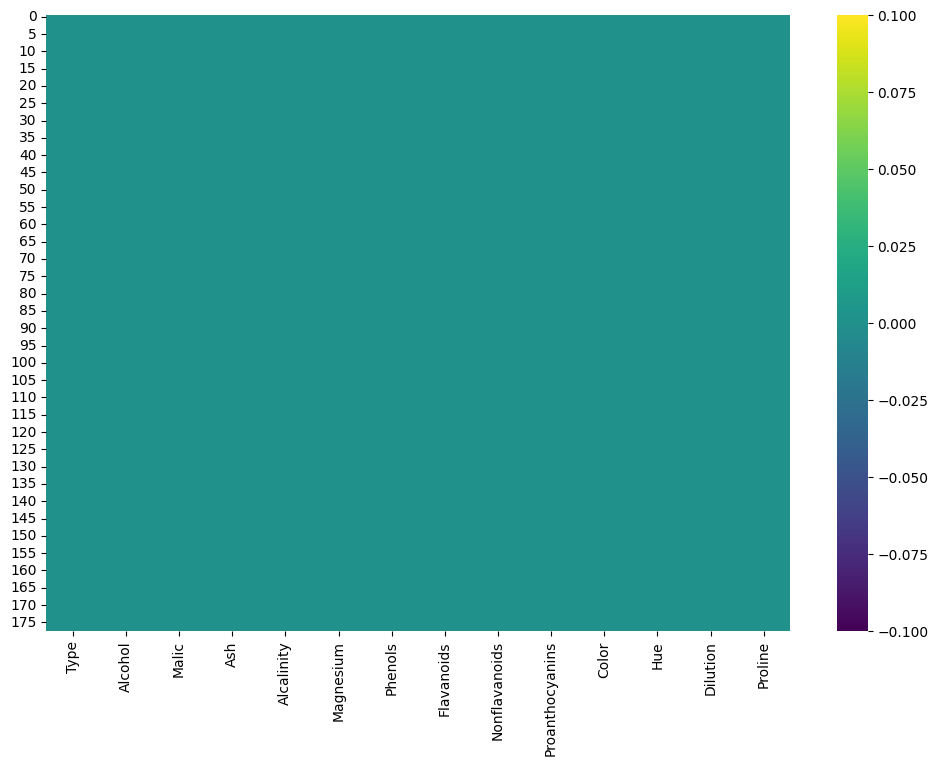

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.isnull(),cmap='viridis');

In [9]:
wine.duplicated().sum()

0

In [10]:
wine.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [11]:
wine[wine.duplicated()]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

In [12]:
# Checking for type column

wine['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [13]:
wine.Type.unique()

array([1, 2, 3])

In [14]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [15]:
wine['ID'] = range(1, 179, 1)
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0           0.28             2.29   5.64  1.04      3.92     1065   1  
1           0.26             1.28   4.38  1.05      3.40     1050   2  
2           0.30             2.81   5.68  1.03      3.17     1185   3  
3           0.24             2.18   7.80  0.86      3.45     1480   4  
4           0.39             1.82   4.32  1.04      2.93      735   5

In [16]:
data = wine.drop('Type',axis=1)

* EDA

In [17]:
data.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

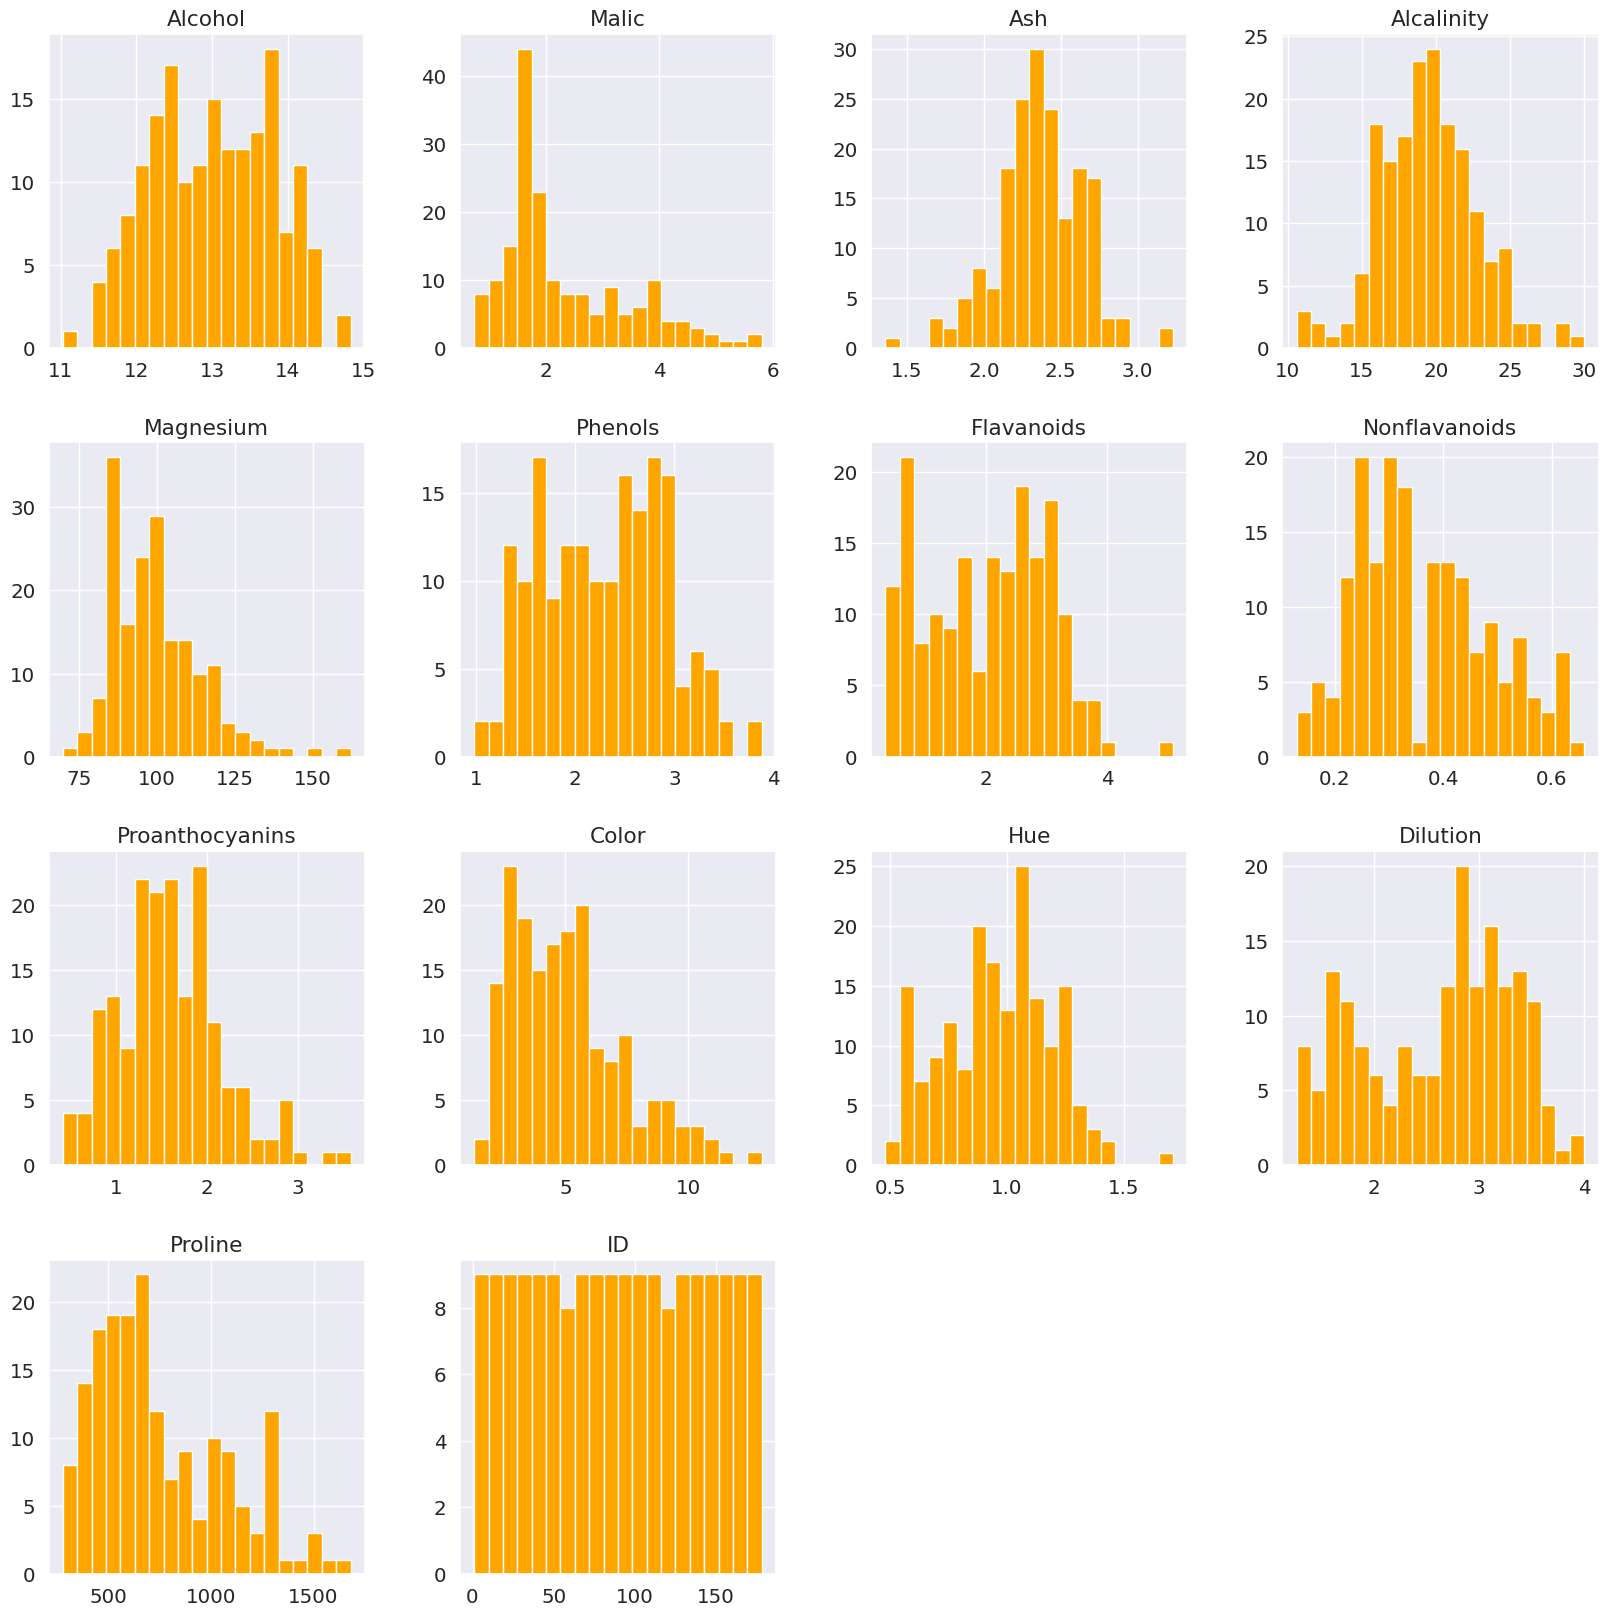

In [18]:
# Plotting the Histogram for the numeric data

sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='orange' )

In [19]:
# Outliers

data.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

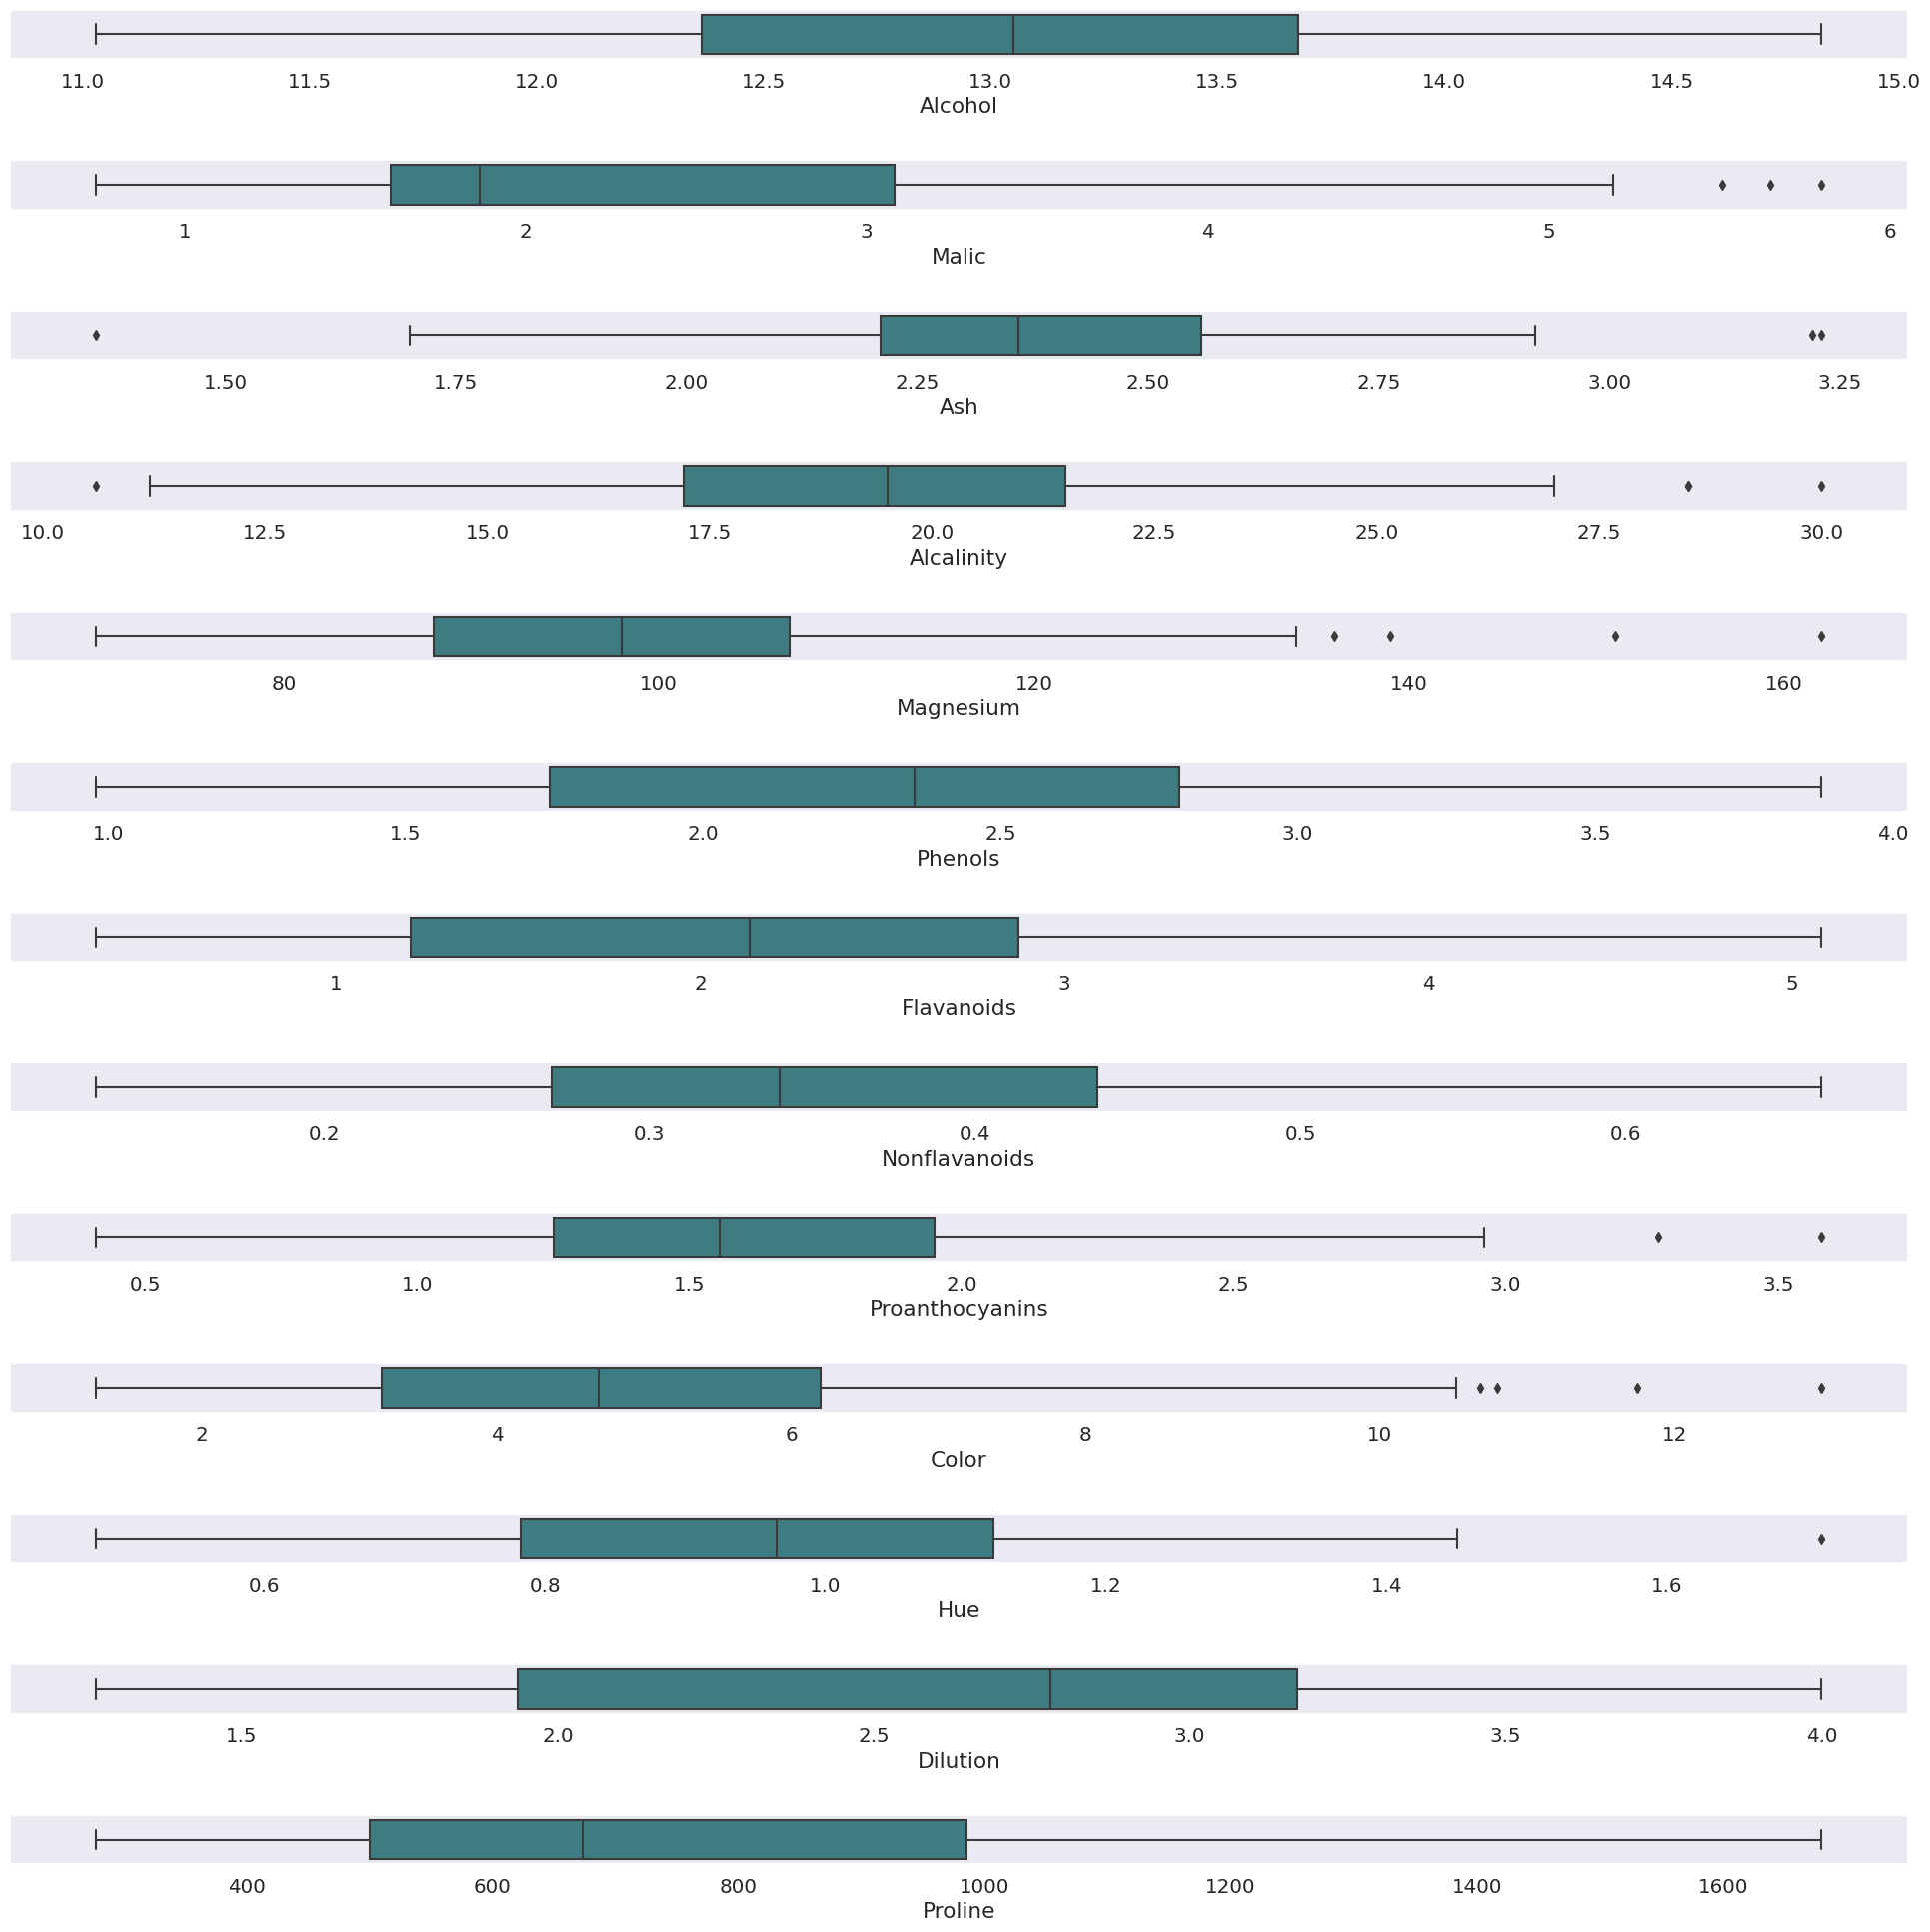

In [20]:
ot=data.copy()
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

as we can see we have outliers in our dataset

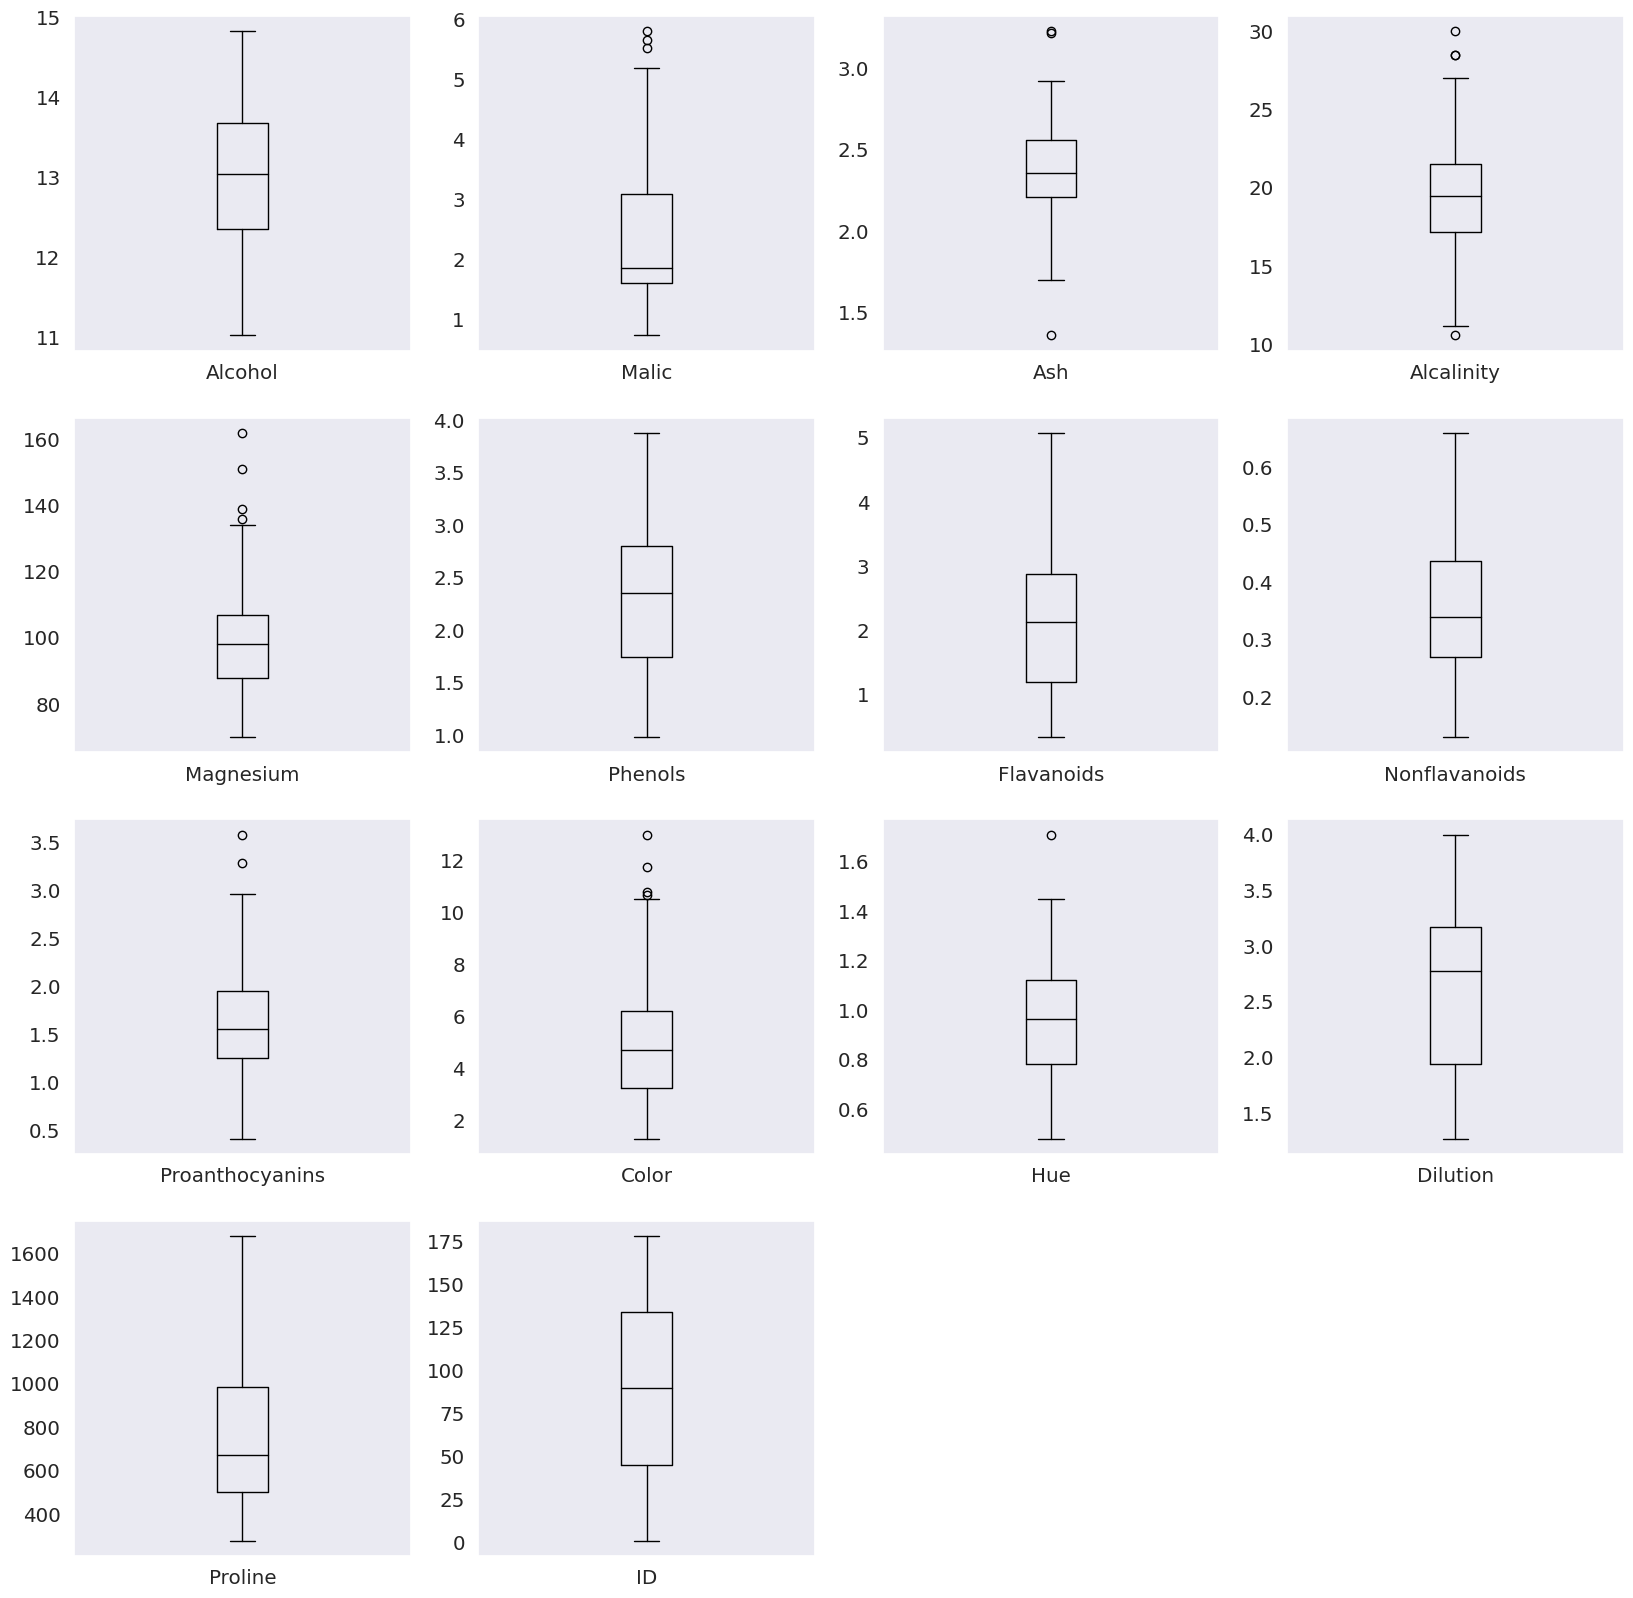

In [21]:
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

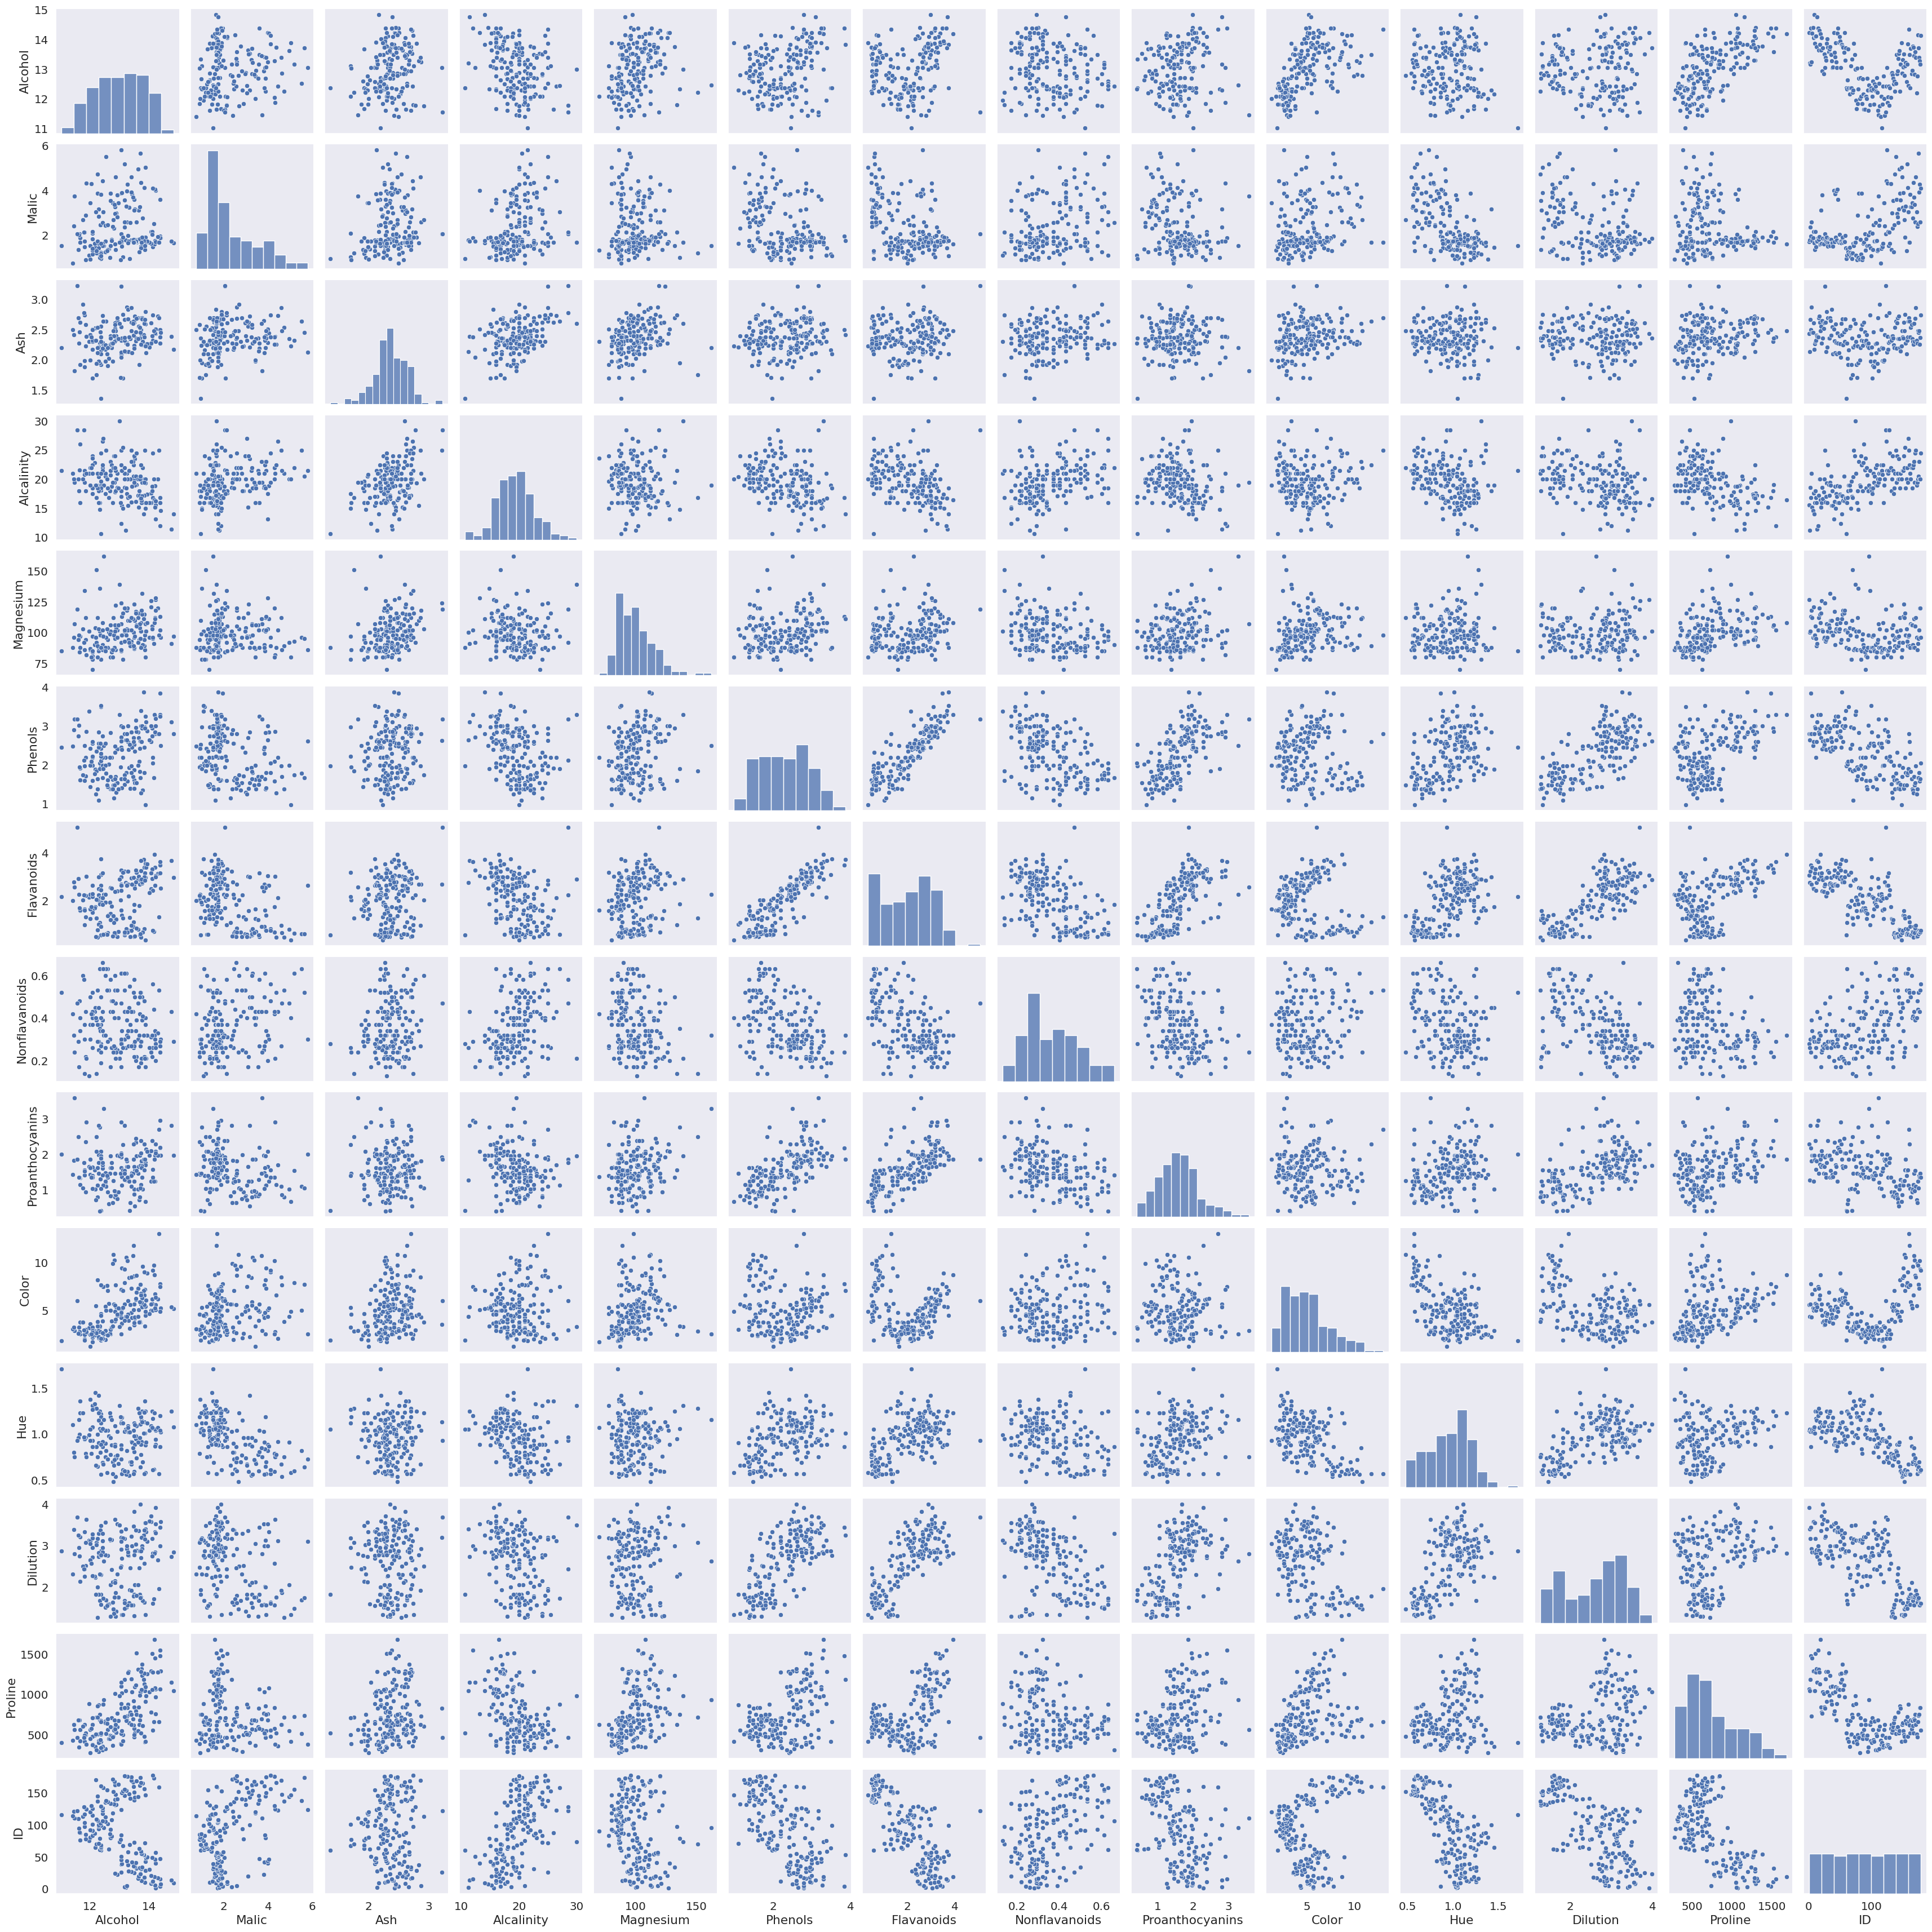

In [23]:
sns.pairplot(data,palette="rocket")

In [24]:
data.corr()

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   
ID              -0.362844  0.487630 -0.016086    0.563955  -0.232275   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   
ID              -0.650084   -0.758609       0.482817        -0.406681   

                    Color       Hue  Dilution   Proline        ID  
Alcohol          0.546364 -0.071747  0.072343  0.643720 -0.362844  
Malic            0.248985 -0.561296 -0.368710 -0.192011  0.487630  
Ash              0.258887 -0.074667  0.003911  0.223626 -0.016086  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  0.563955  
Magnesium        0.199950  0.055398  0.066004  0.393351 -0.232275  
Phenols         -0.055136  0.433681  0.699949  0.498115 -0.650084  
Flavanoids      -0.172379  0.543479  0.787194  0.494193 -0.758609  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  0.482817  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417 -0.406681  
Color            1.000000 -0.521813 -0.428815  0.316100  0.255444  
Hue             -0.521813  1.000000  0.565468  0.236183 -0.662205  
Dilution        -0.428815  0.565468  1.000000  0.312761 -0.697445  
Proline          0.316100  0.236183  0.312761  1.000000 -0.644330  
ID               0.255444 -0.662205 -0.697445 -0.644330  1.000000

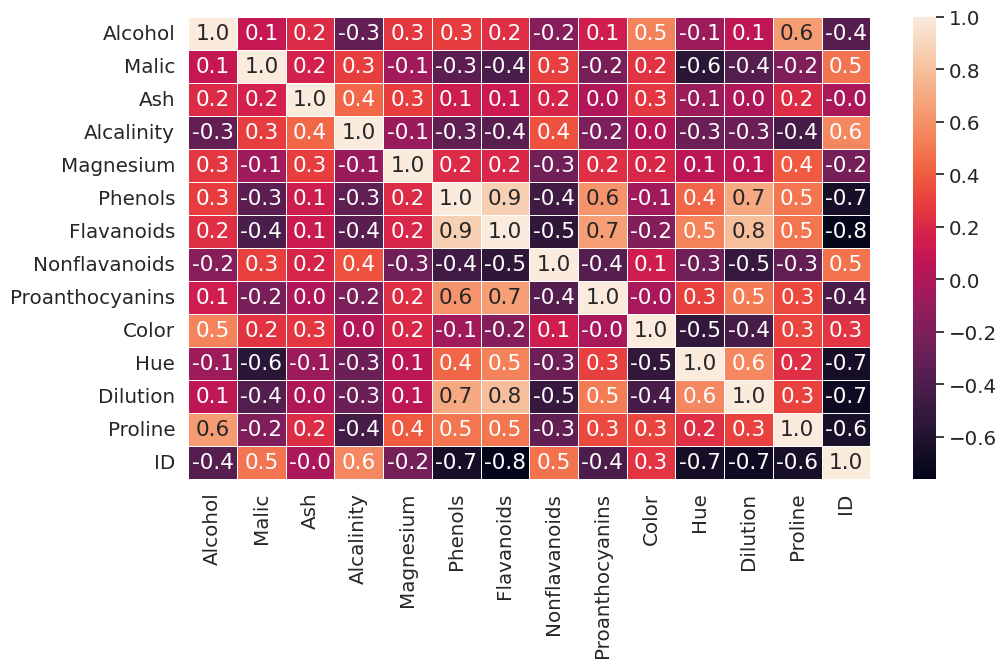

In [28]:
f,ax = plt.subplots(figsize=(11,6))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

as we can see the Phenols and Flavanoids are highly correlated

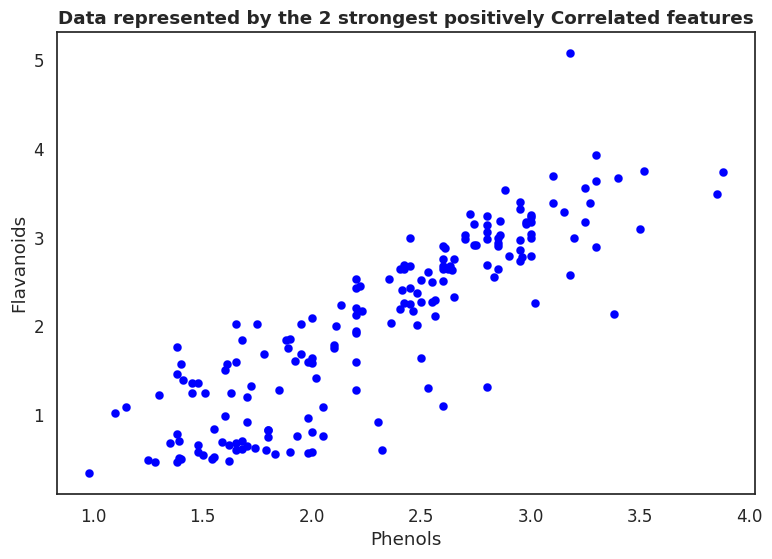

In [30]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=data['Phenols'], y=data['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

In [29]:
df = data.copy()

In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

In [32]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

* PCA

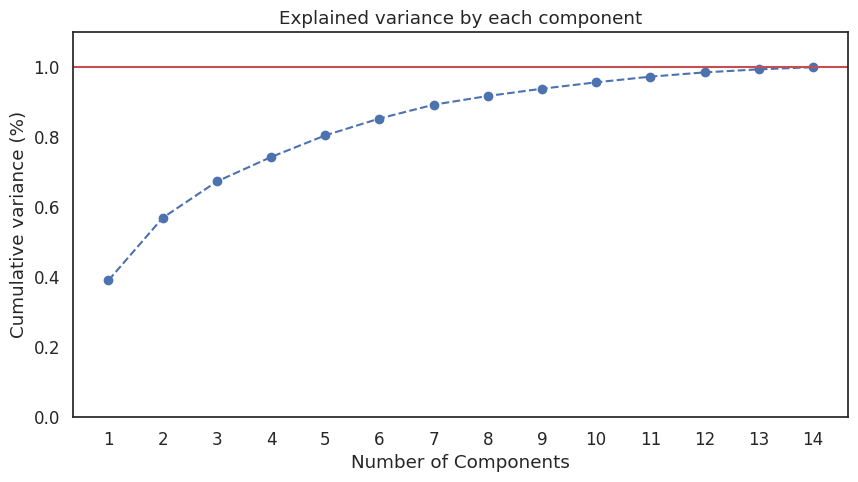

In [33]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [34]:
# the amount of variance that each PCA explains is

var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

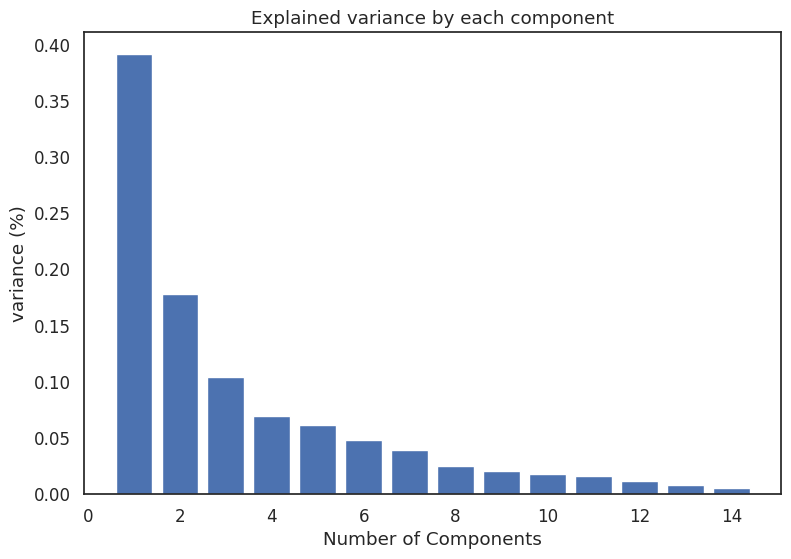

In [35]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [36]:
# Cumulative Variance

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [37]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

Text(0, 0.5, 'PC2')

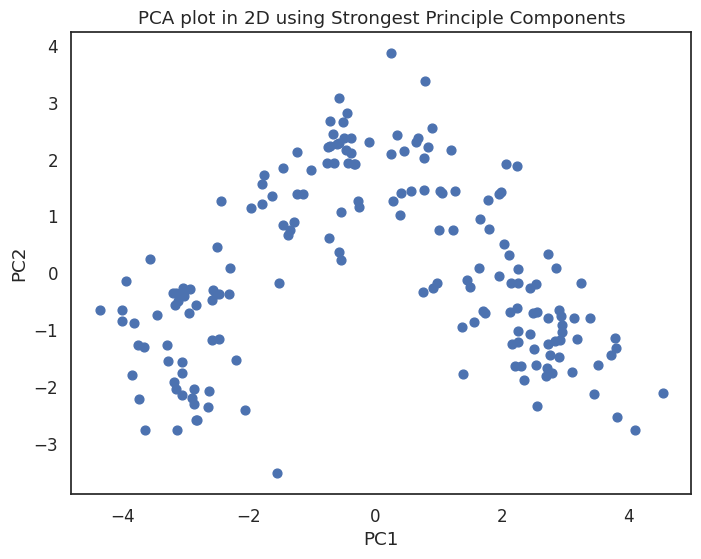

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

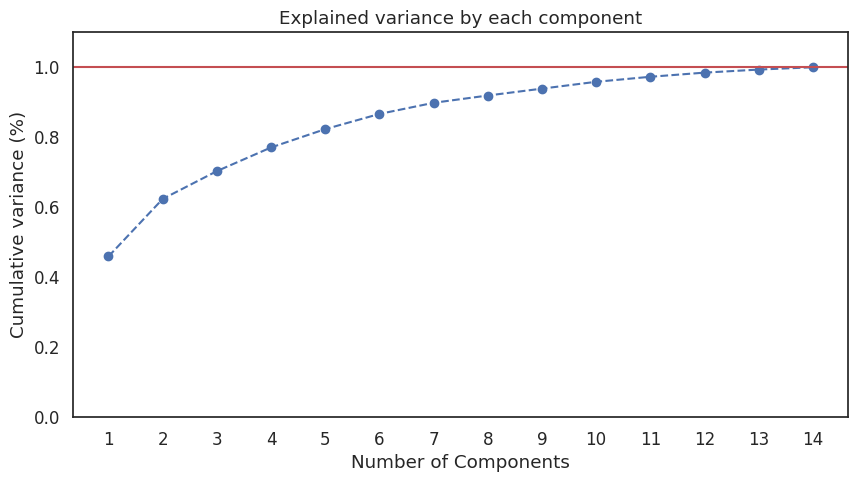

In [39]:
pca_var = PCA()
pca_var.fit(minmax_df)
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [40]:
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

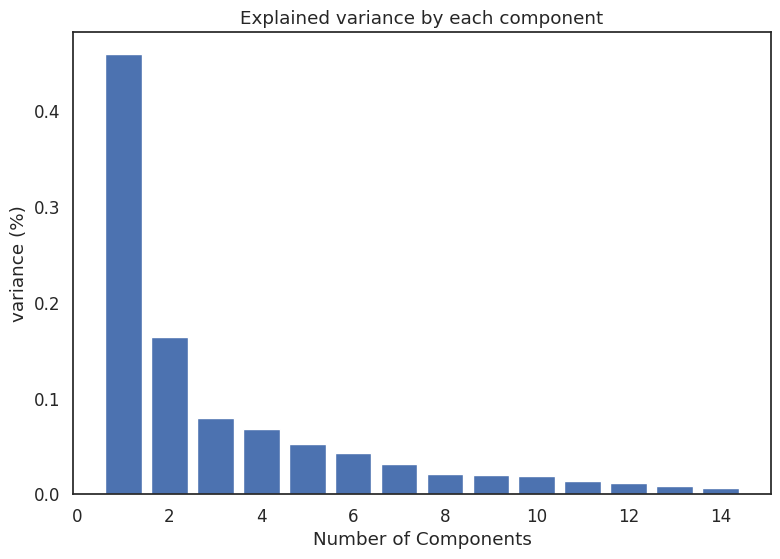

In [41]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [42]:
# Cumulative Variance

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [43]:
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

In [44]:
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

In [45]:
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

Text(0, 0.5, 'PC2')

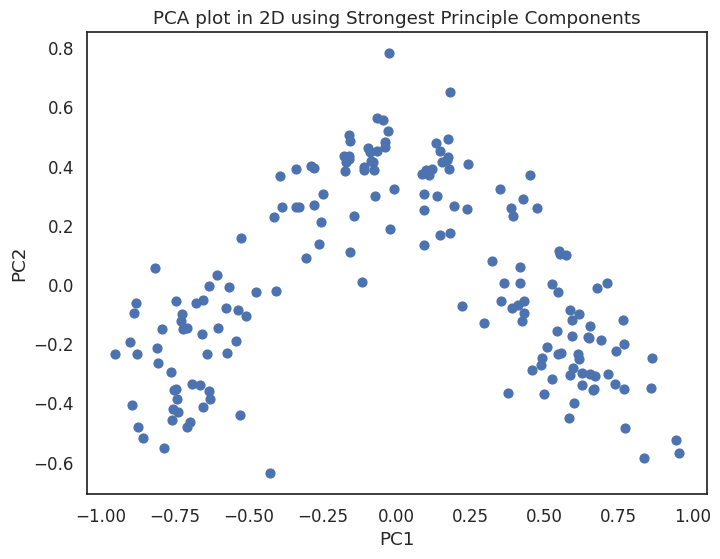

In [46]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

* Elbow Method

In [47]:
!pip3 install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12529 sha256=e7939ba864eba2e7597ca57e9bfb64db7e968bcbde5aba18d441f09828412490
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [48]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=60c60cccf87283f68658eb199ca5becd2d18194b59e82a2cef96073dfde11d6a
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [49]:
import pyforest

In [50]:
lazy_imports()

['import statsmodels.api as sm',
 'import keras',
 'from sklearn.linear_model import RidgeCV',
 'import pydot',
 'from sklearn.model_selection import StratifiedKFold',
 'import fbprophet',
 'import numpy as np',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from openpyxl import load_workbook',
 'import nltk',
 'from scipy import signal as sg',
 'from sklearn import metrics',
 'import pickle',
 'import plotly as py',
 'import sys',
 'import plotly.graph_objs as go',
 'from sklearn.decomposition import PCA',
 'from sklearn.linear_model import ElasticNetCV',
 'import re',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import RobustScaler',
 'import fastai',
 'import gensim',
 'from sklearn.ensemble import RandomForestClassifier',
 'import lightgbm as lgb',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly.express as px',
 'from sklearn.preprocessing import OneHotEncoder',
 'import altair as alt',
 'from sklearn.m

  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

 12%|█▎        | 1/8 [00:00<00:02,  2.78it/s]

<IPython.core.display.Javascript object>

 25%|██▌       | 2/8 [00:00<00:02,  2.86it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 3/8 [00:01<00:01,  2.72it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 4/8 [00:01<00:01,  3.12it/s]

<IPython.core.display.Javascript object>

 62%|██████▎   | 5/8 [00:01<00:00,  3.26it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 6/8 [00:01<00:00,  3.73it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 7/8 [00:02<00:00,  3.47it/s]

<IPython.core.display.Javascript object>

100%|██████████| 8/8 [00:02<00:00,  3.35it/s]


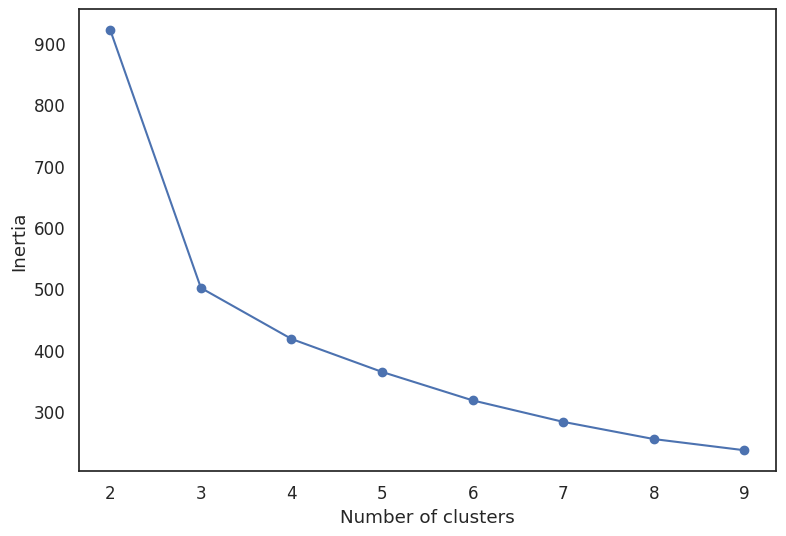

In [51]:
import matplotlib.pyplot as plt
from tqdm import tqdm
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=15,
                    max_iter=500,
                    random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [53]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=15,
                    max_iter=500,
                    random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 3/8 [00:00<00:01,  3.41it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 4/8 [00:00<00:00,  4.34it/s]

<IPython.core.display.Javascript object>

 62%|██████▎   | 5/8 [00:01<00:00,  5.26it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 6/8 [00:01<00:00,  5.10it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 7/8 [00:01<00:00,  4.81it/s]

<IPython.core.display.Javascript object>

100%|██████████| 8/8 [00:01<00:00,  4.14it/s]


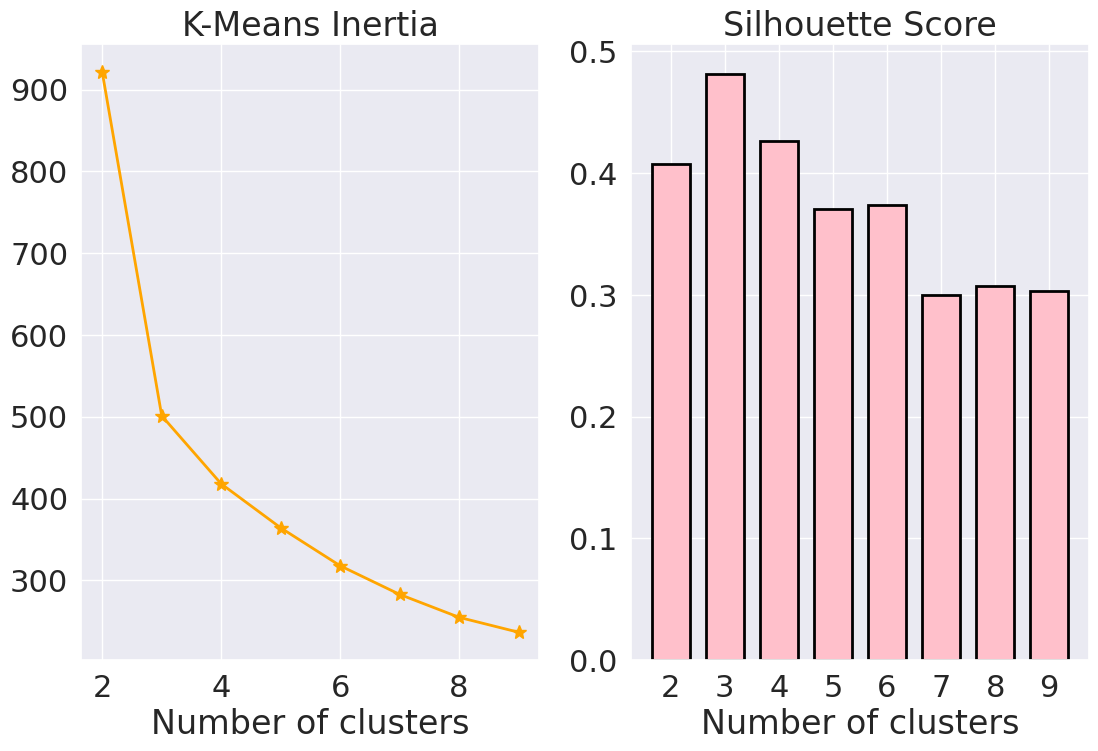

In [64]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="orange", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="pink" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

plt.show()

In [61]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

<IPython.core.display.Javascript object>

For n_clusters = 2 The average silhouette_score is : 0.40748327911081


<IPython.core.display.Javascript object>

For n_clusters = 3 The average silhouette_score is : 0.4817835370724268


<IPython.core.display.Javascript object>

For n_clusters = 4 The average silhouette_score is : 0.4310924081843296


<IPython.core.display.Javascript object>

For n_clusters = 5 The average silhouette_score is : 0.41489679453806727


<IPython.core.display.Javascript object>

For n_clusters = 6 The average silhouette_score is : 0.3837227147675391


<IPython.core.display.Javascript object>

For n_clusters = 7 The average silhouette_score is : 0.3099655723567321


<IPython.core.display.Javascript object>

For n_clusters = 8 The average silhouette_score is : 0.28862996728423584


<IPython.core.display.Javascript object>

For n_clusters = 9 The average silhouette_score is : 0.2957346845976878


In [65]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

<IPython.core.display.Javascript object>

(178,)

In [66]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [67]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [68]:
model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [69]:
model_kmeans.inertia_

501.17482400537745

In [70]:
#Assign clusters to the data set

data['Kmeans_label'] = model_kmeans.labels_
data.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.246418  1.891642  2.242985  20.140299   93.238806  2.258209   
2             13.711475  1.997049  2.453770  17.281967  107.786885  2.842131   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000       0.45040        1.156400  7.264400  0.686200   
1              2.085672       0.36194        1.612836  3.059701  1.059493   
2              2.969180       0.28918        1.922951  5.444590  1.067705   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.798507   508.597015   95.104478  
2             3.154754  1110.639344   31.803279

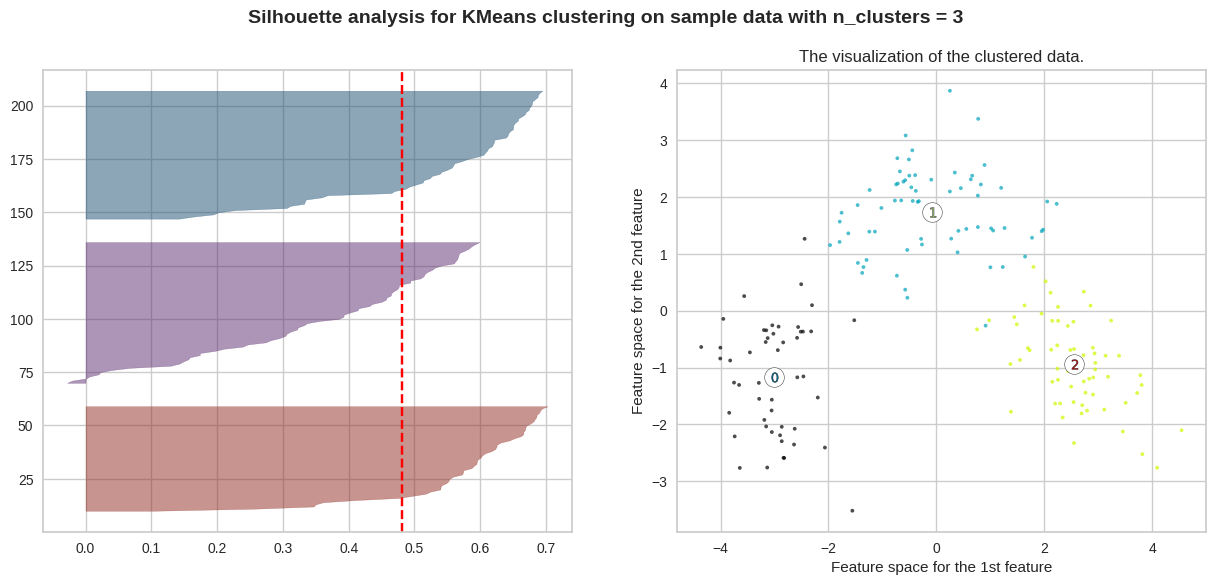

In [73]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
ax2.scatter(pca_std_df.iloc[:, 0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

#sil_visualizer1.show()
plt.show()

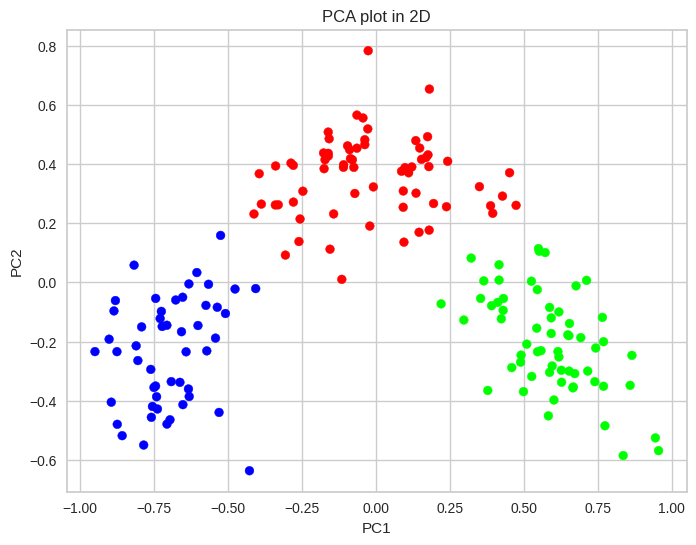

In [74]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

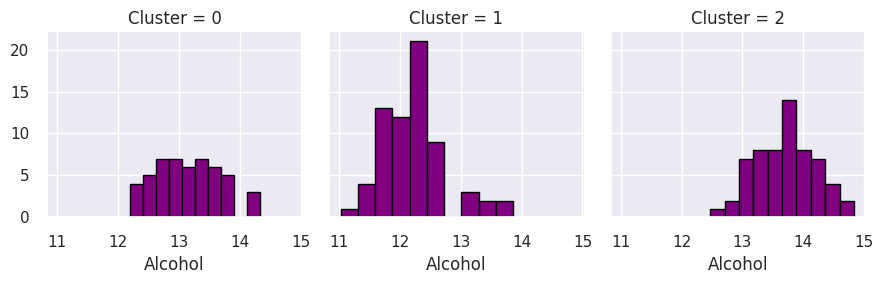

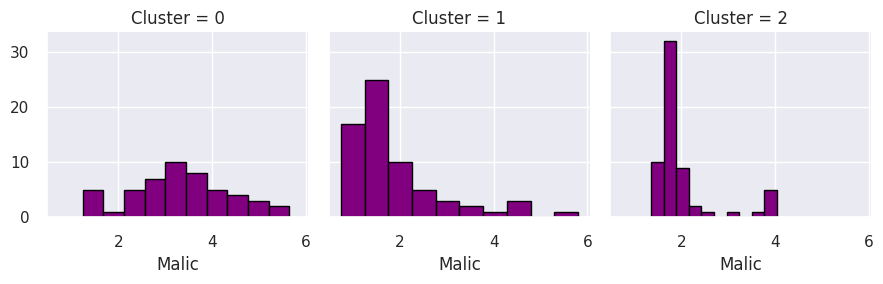

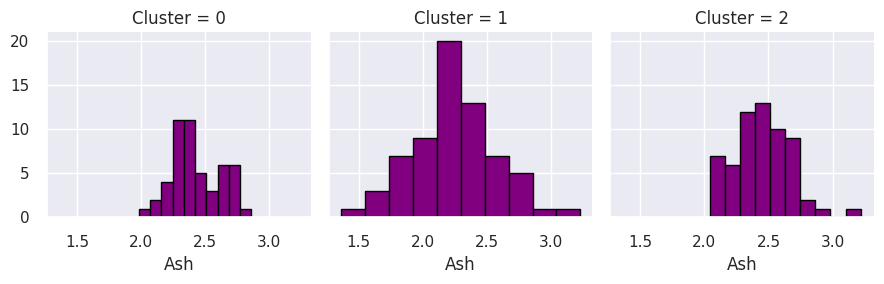

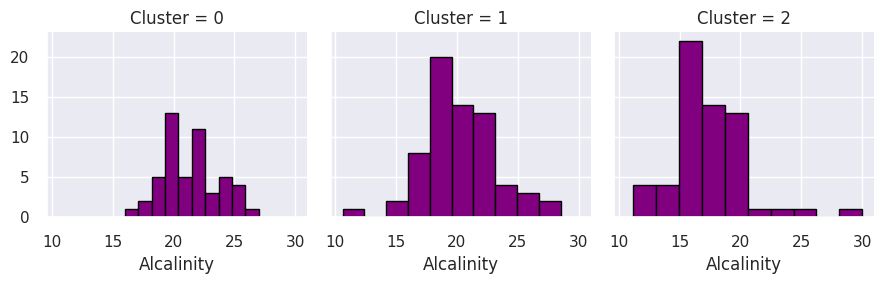

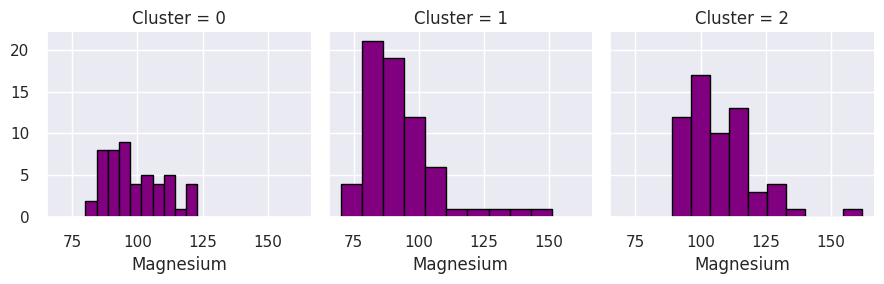

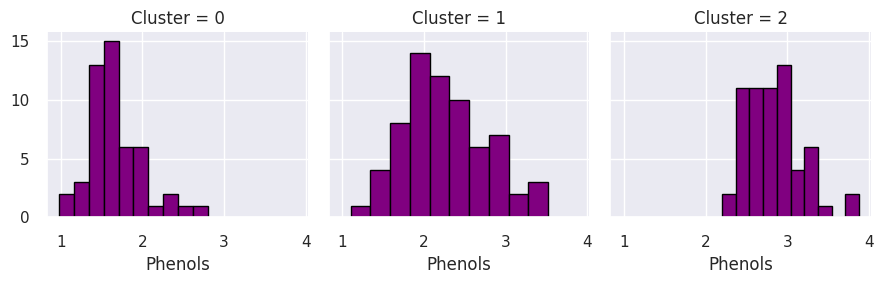

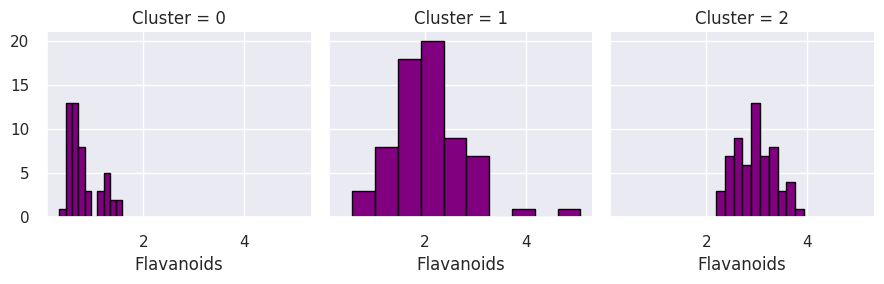

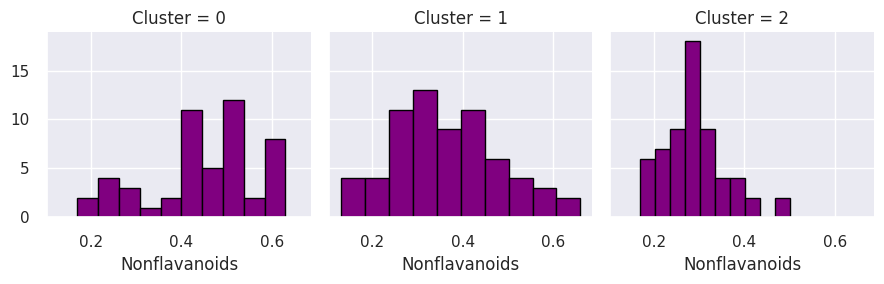

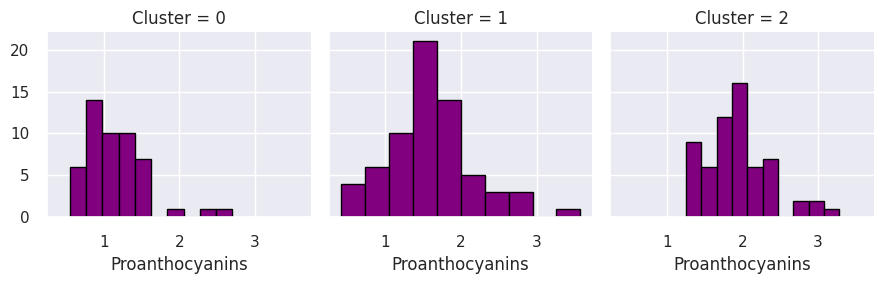

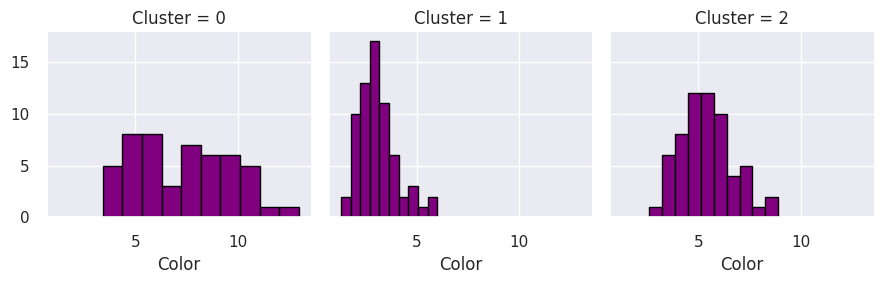

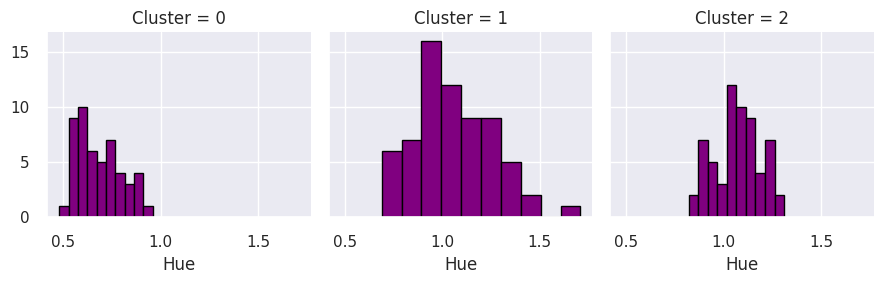

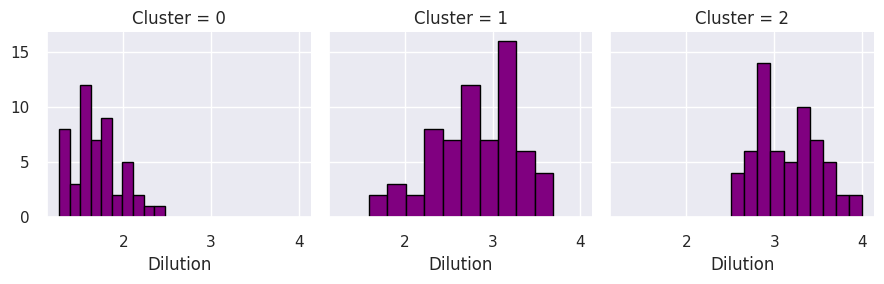

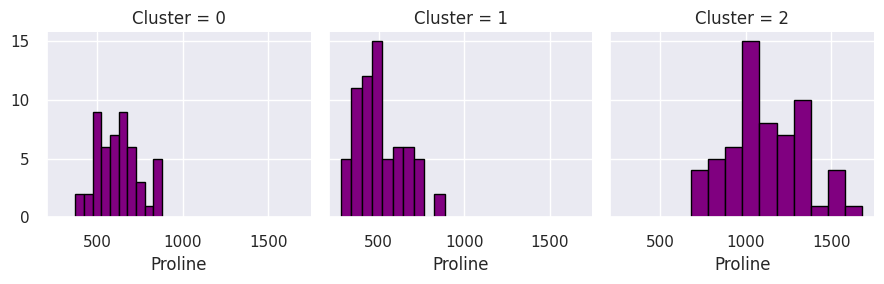

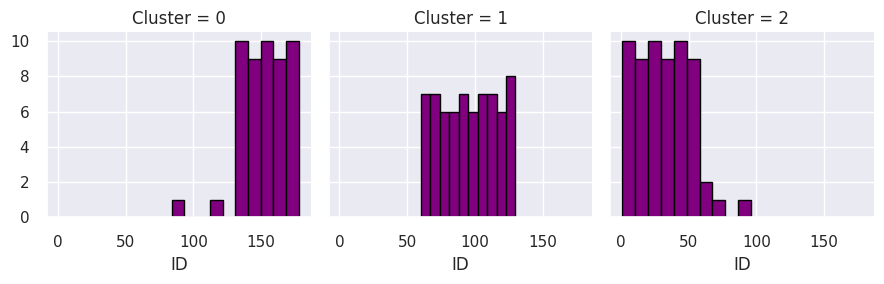

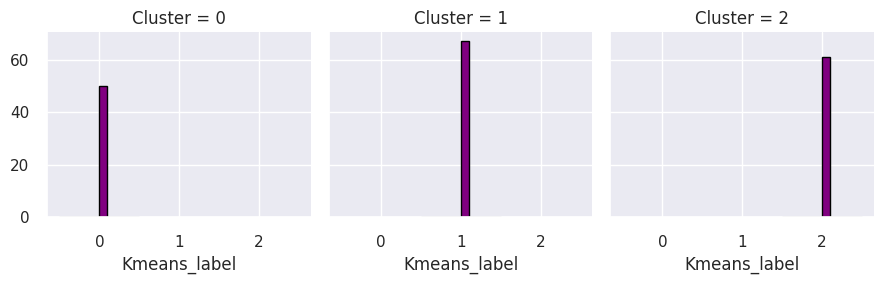

In [76]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,10)}, font_scale=1)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="purple", lw=1, edgecolor="black")

In [77]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [78]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Alcohol               13.1440     12.246418     13.711475
Malic                  3.3462      1.891642      1.997049
Ash                    2.4256      2.242985      2.453770
Alcalinity            21.3300     20.140299     17.281967
Magnesium             98.6400     93.238806    107.786885
Phenols                1.6772      2.258209      2.842131
Flavanoids             0.8070      2.085672      2.969180
Nonflavanoids          0.4504      0.361940      0.289180
Proanthocyanins        1.1564      1.612836      1.922951
Color                  7.2644      3.059701      5.444590
Hue                    0.6862      1.059493      1.067705
Dilution               1.6988      2.798507      3.154754
Proline              622.4400    508.597015   1110.639344
ID                   152.3800     95.104478     31.803279
Kmeans_label           0.0000      1.000000      2.000000
Cluster                0.0000      1.000000      2.000000

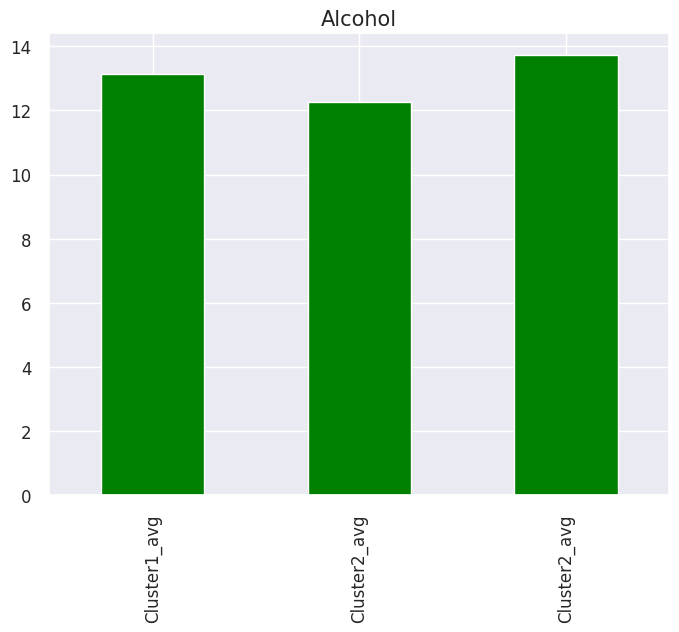

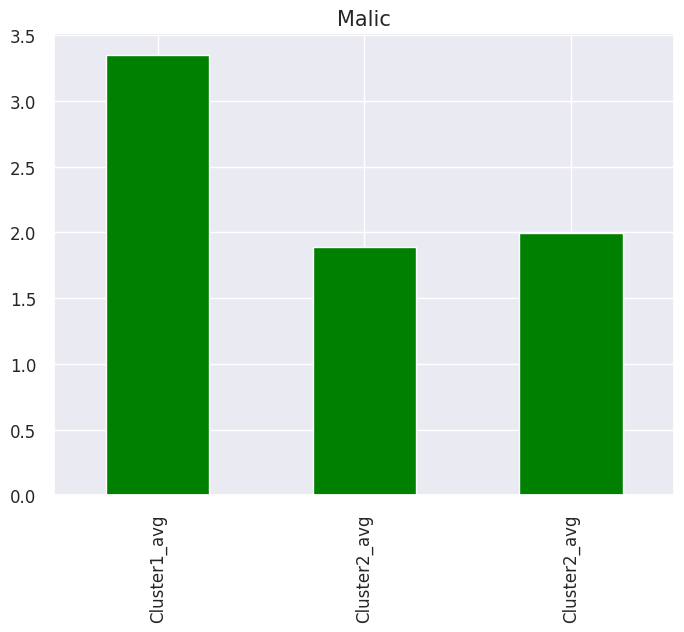

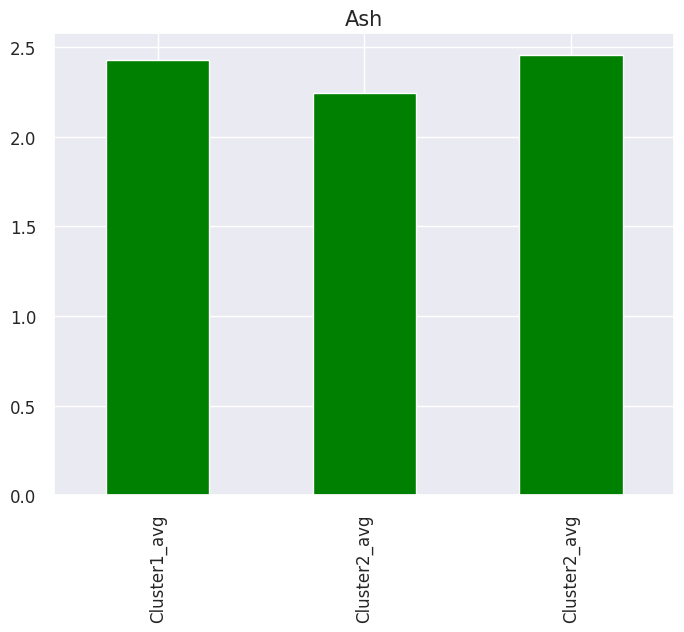

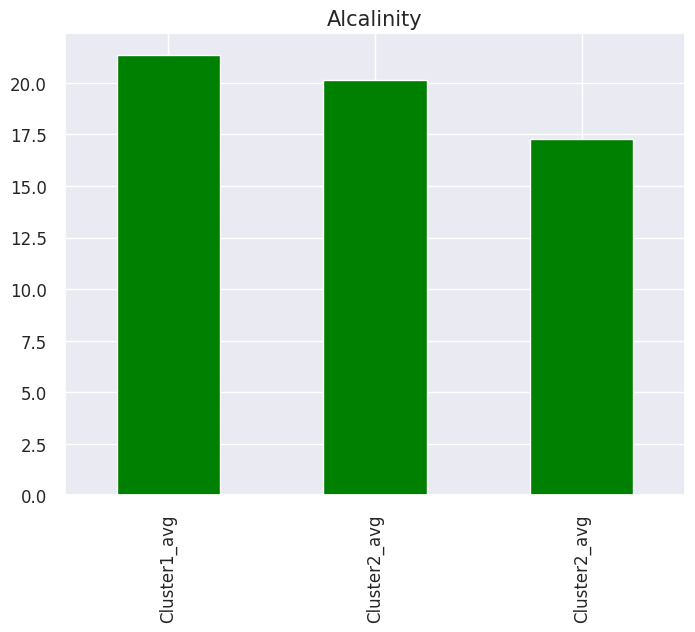

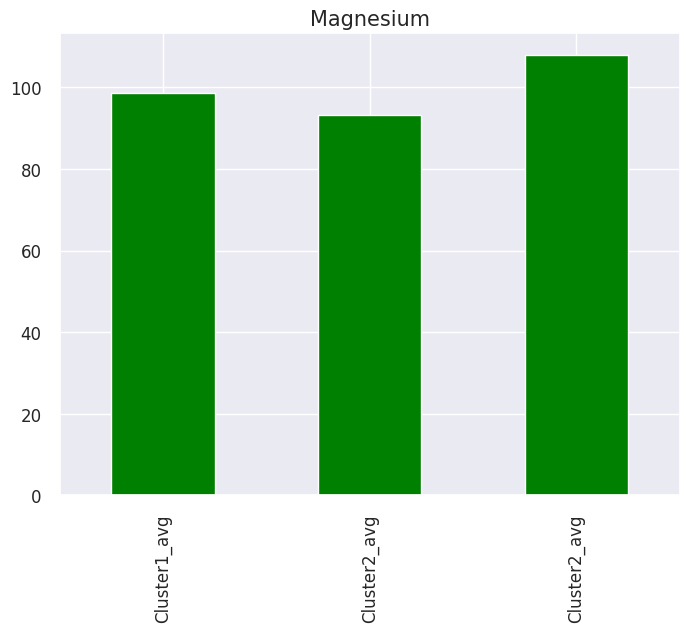

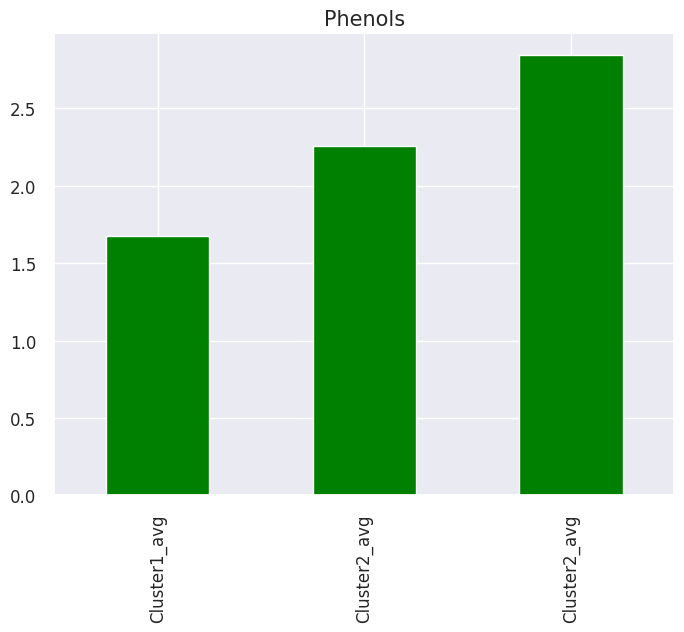

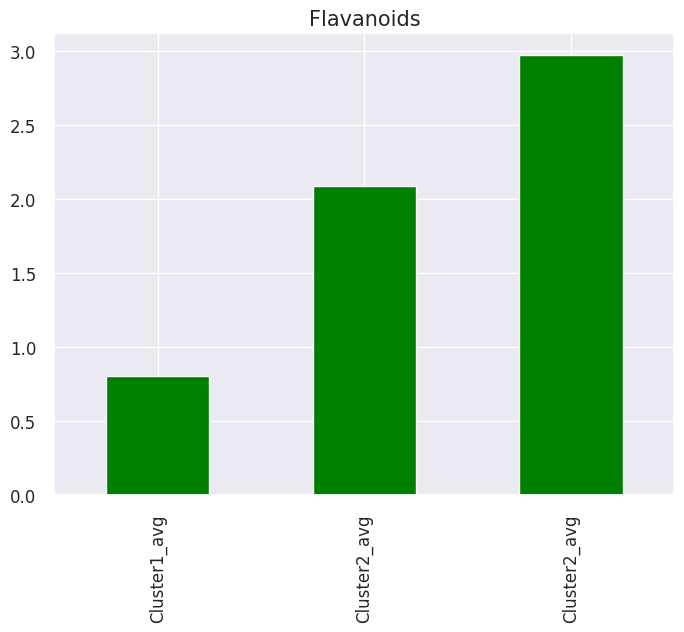

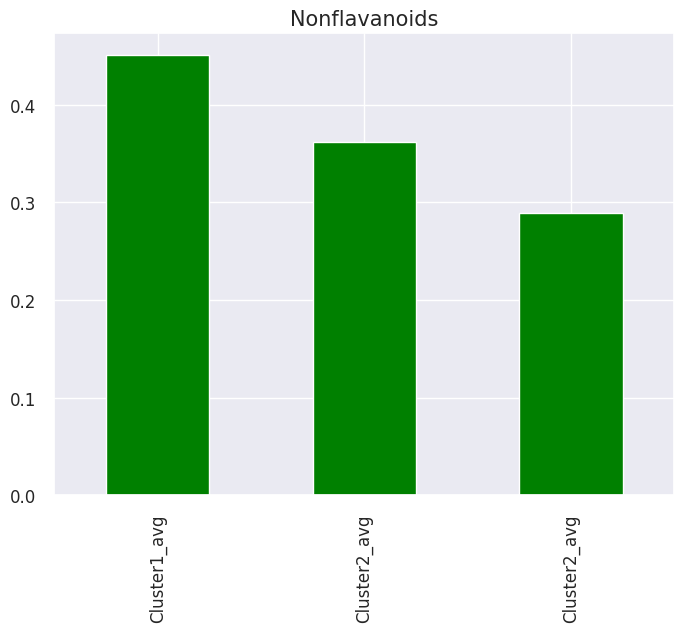

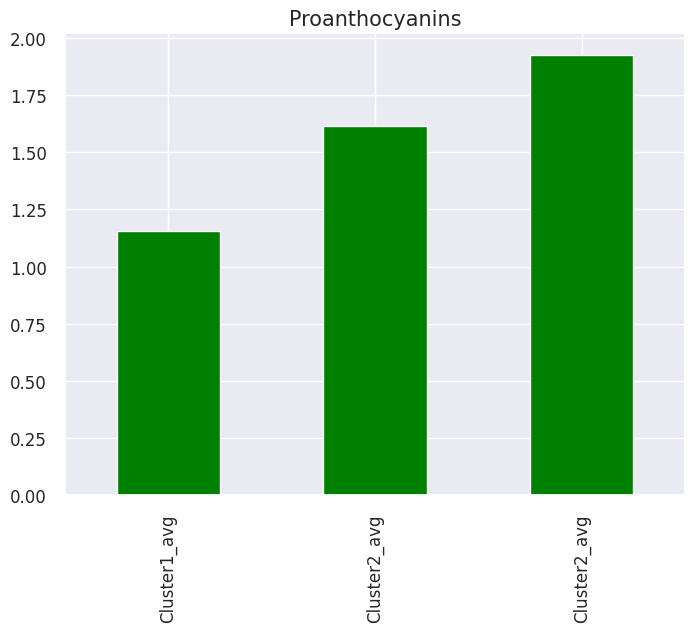

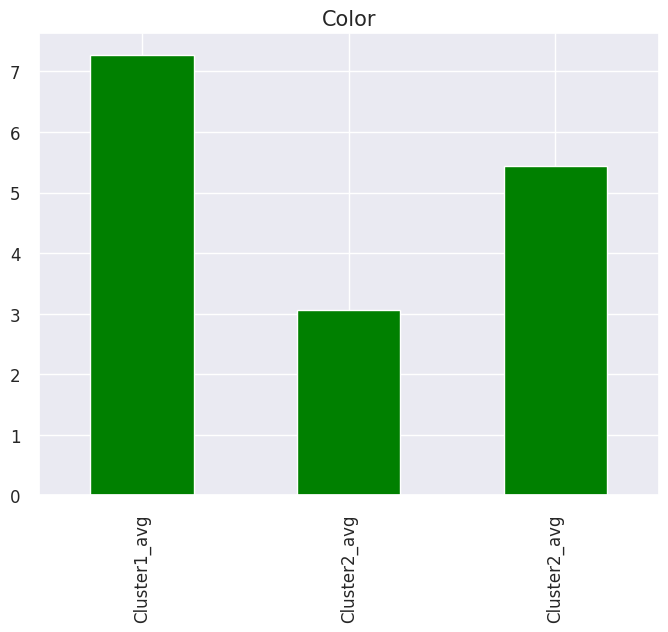

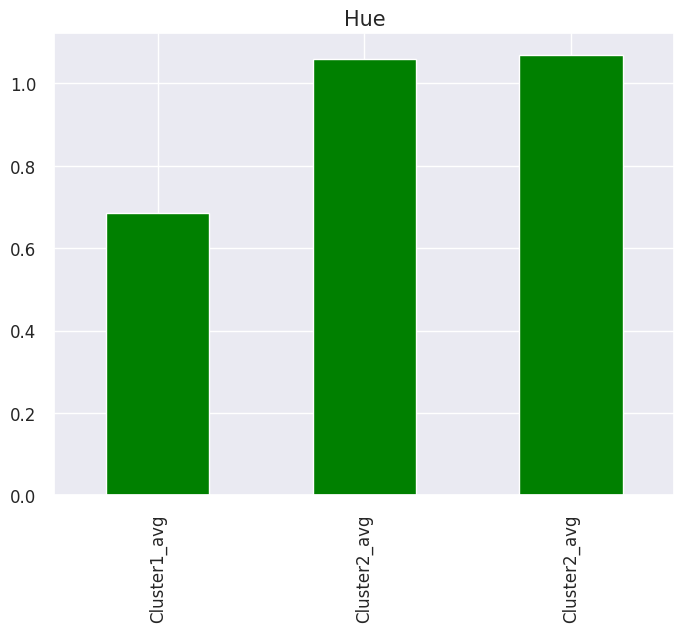

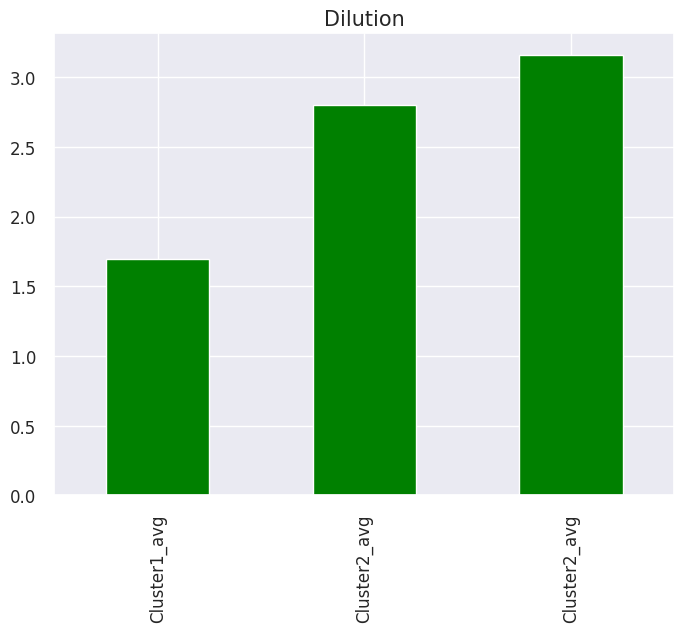

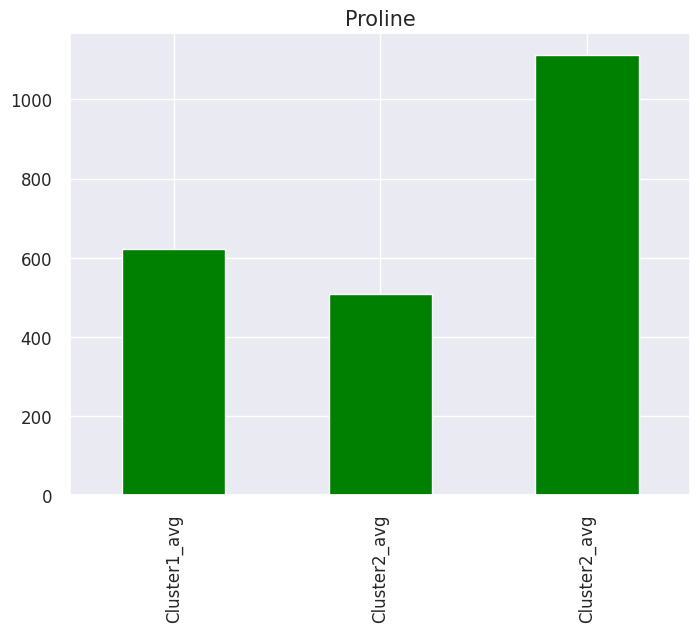

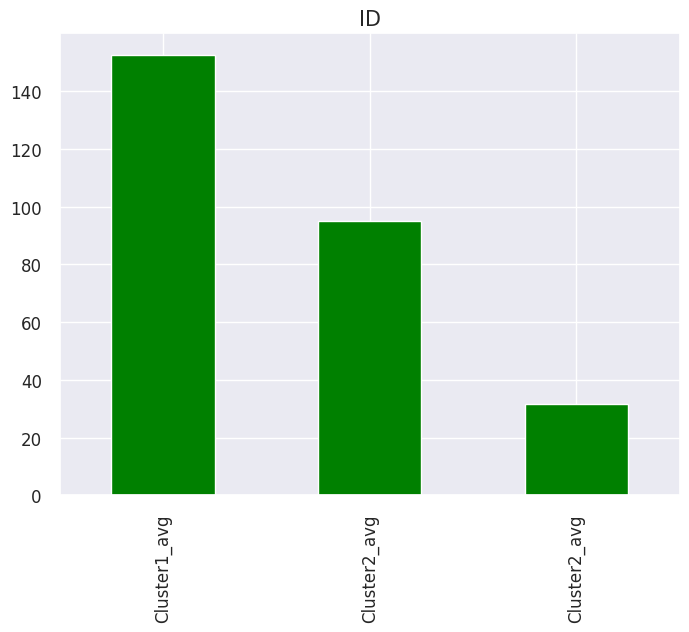

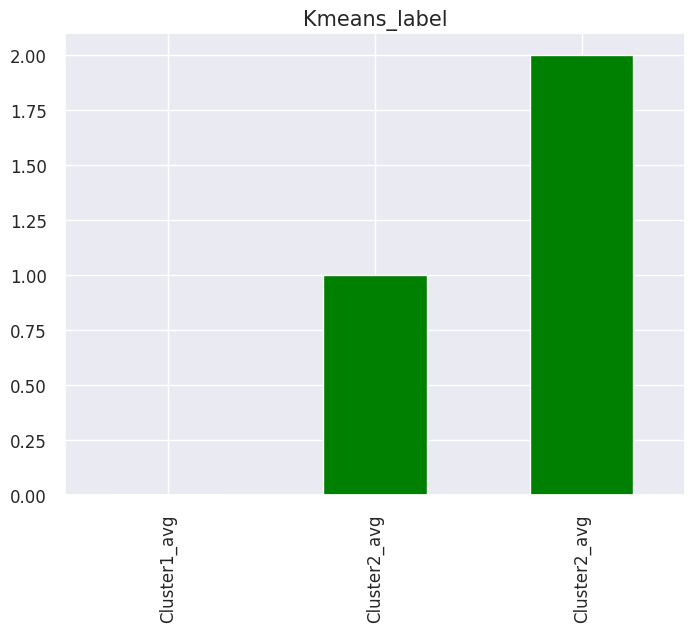

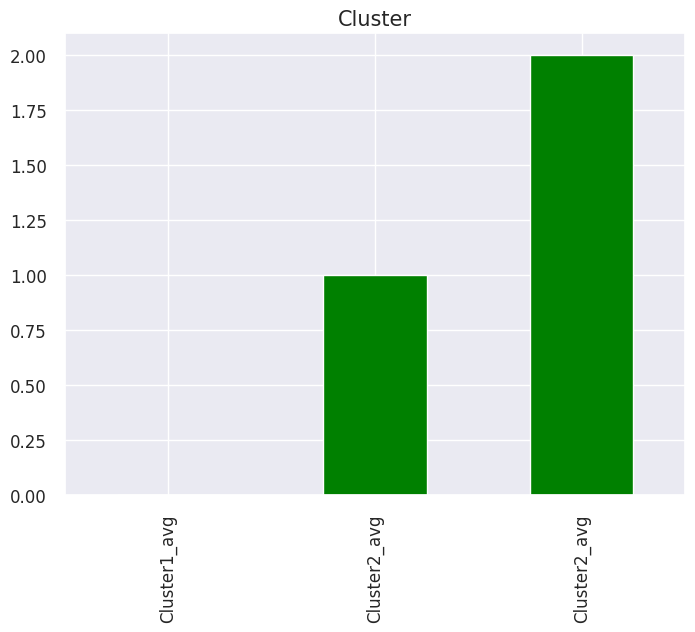

In [81]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=15, fontweight=15)
    j.plot(kind='bar',fontsize=12, color="green")
    plt.show()
    print()

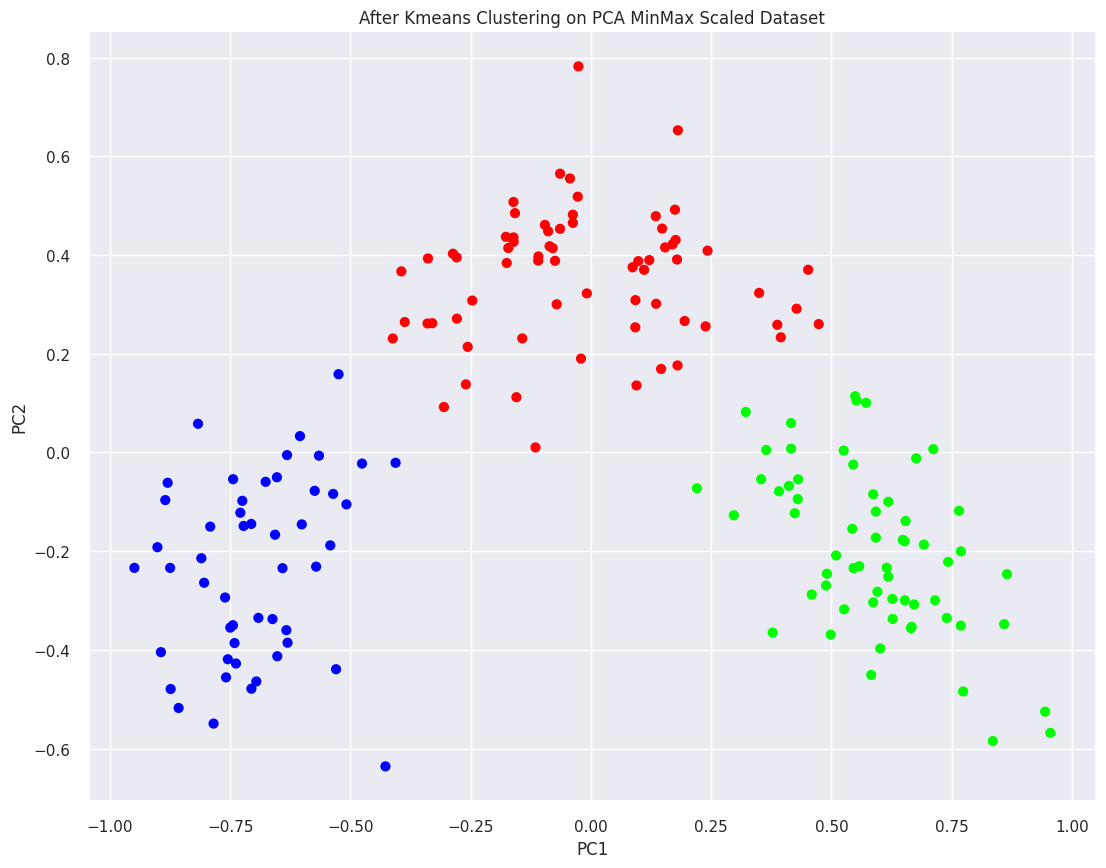

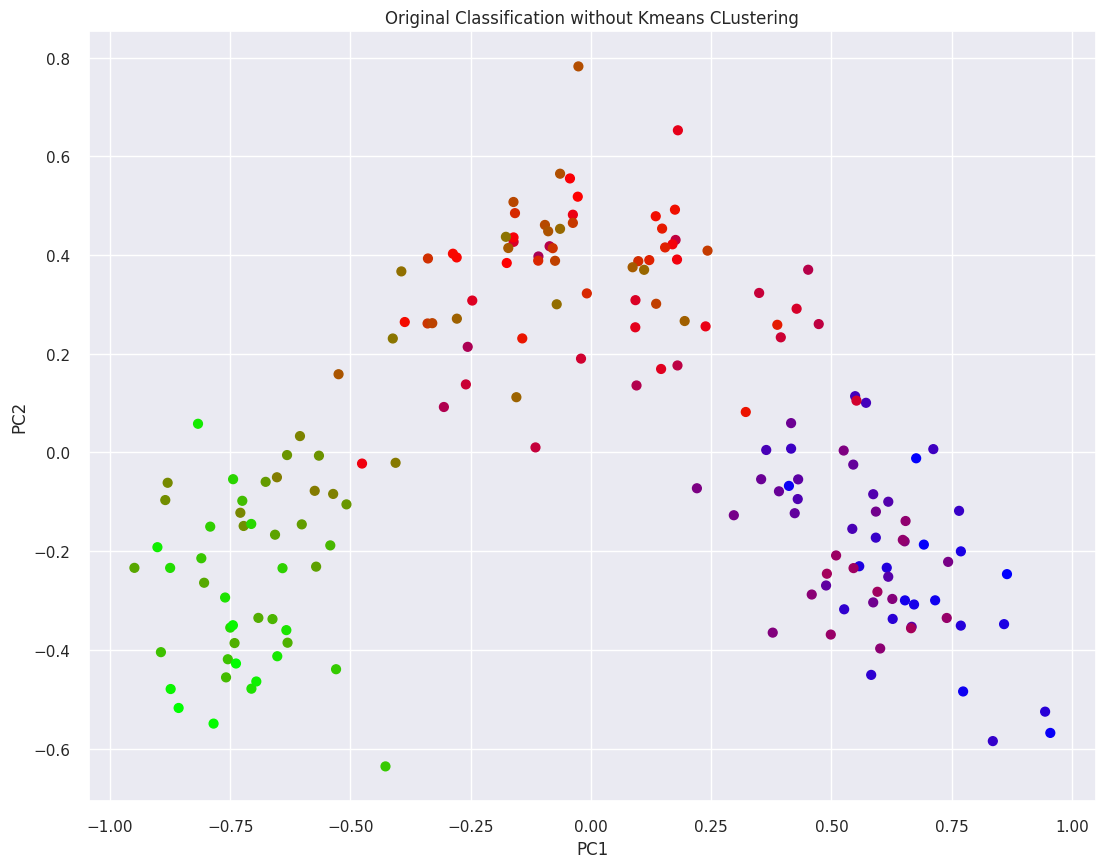

In [82]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['ID'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [83]:
import scipy.cluster.hierarchy as sch

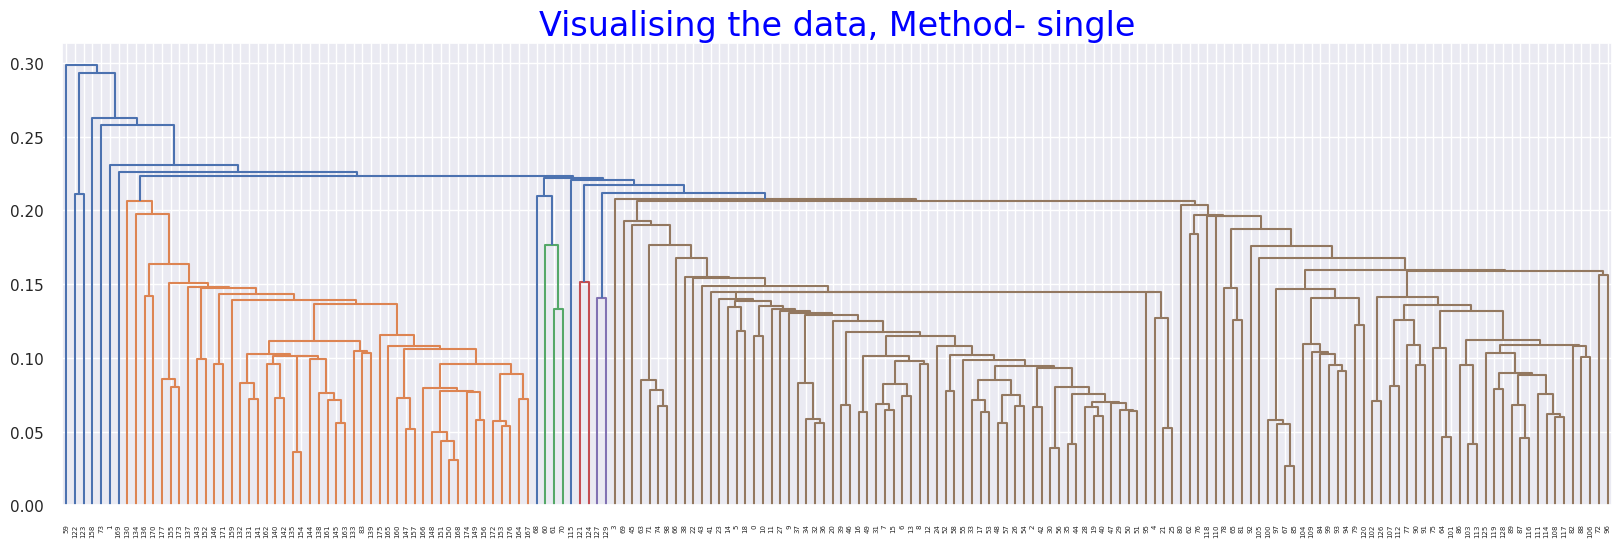

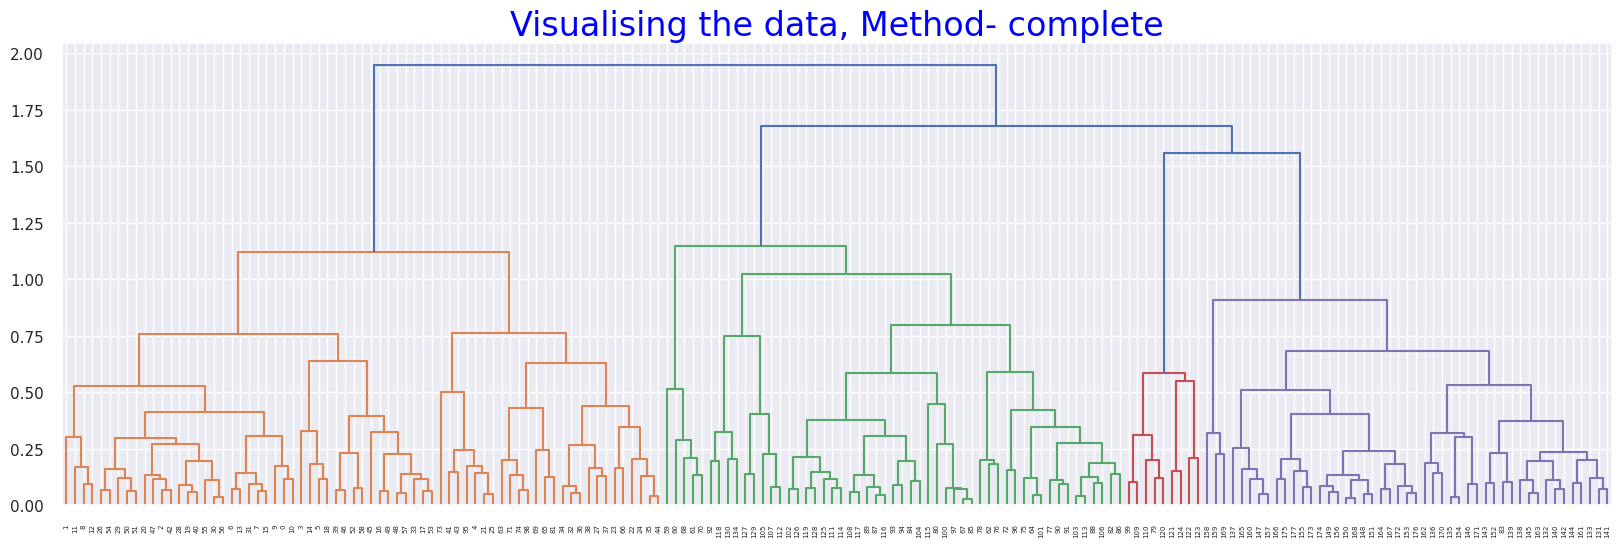

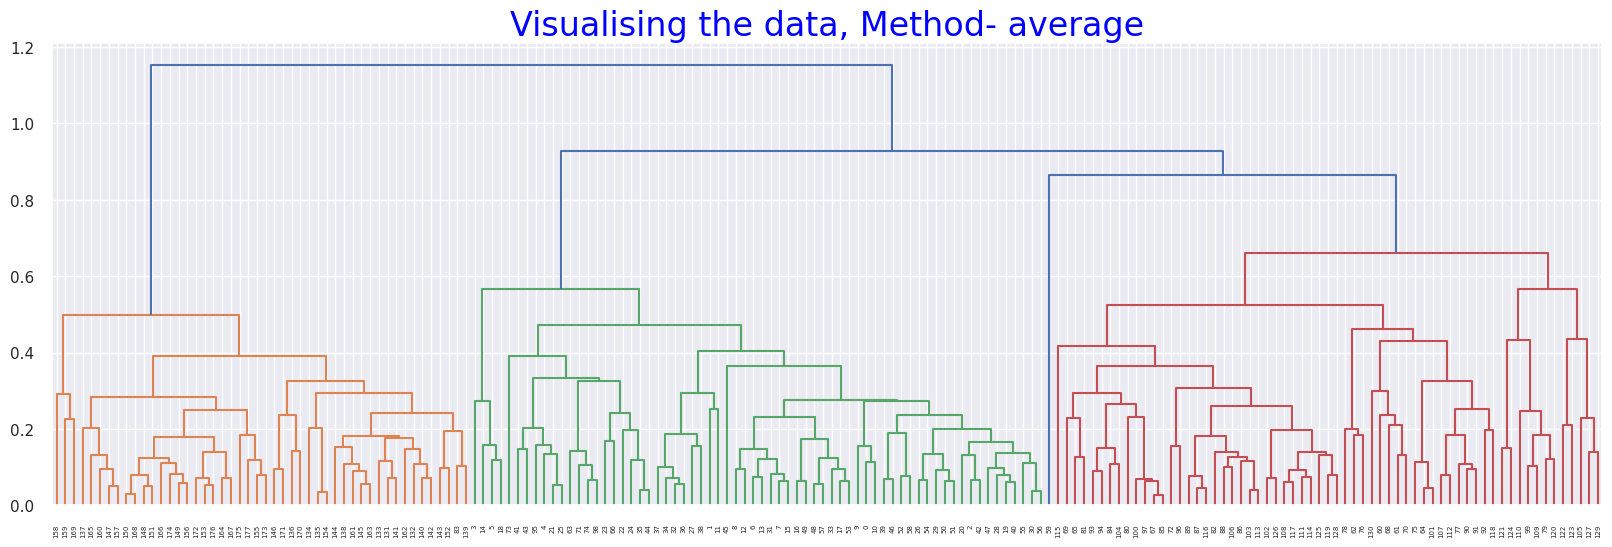

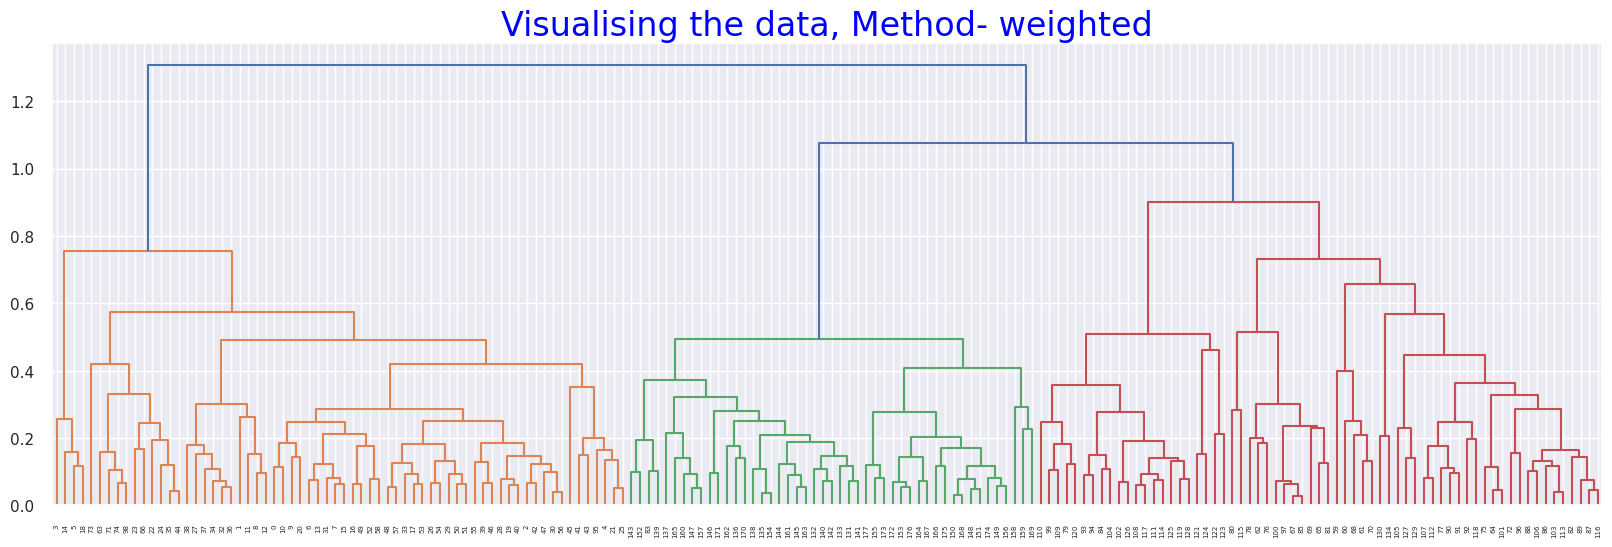

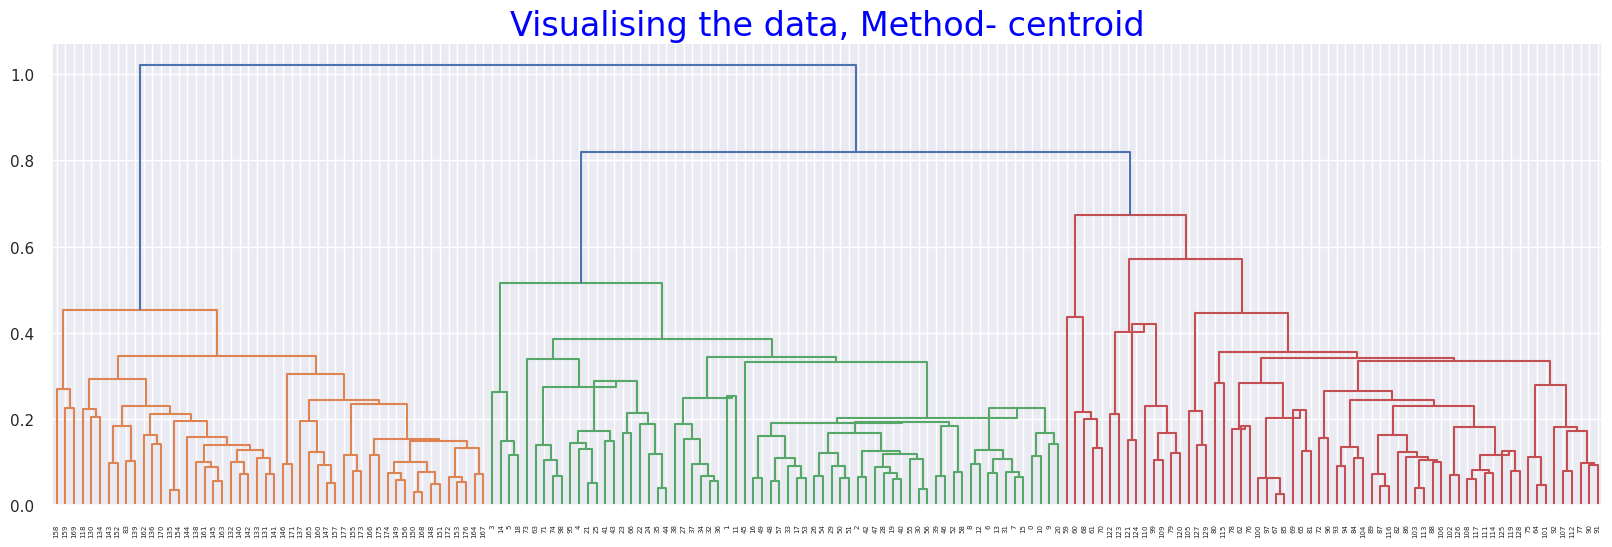

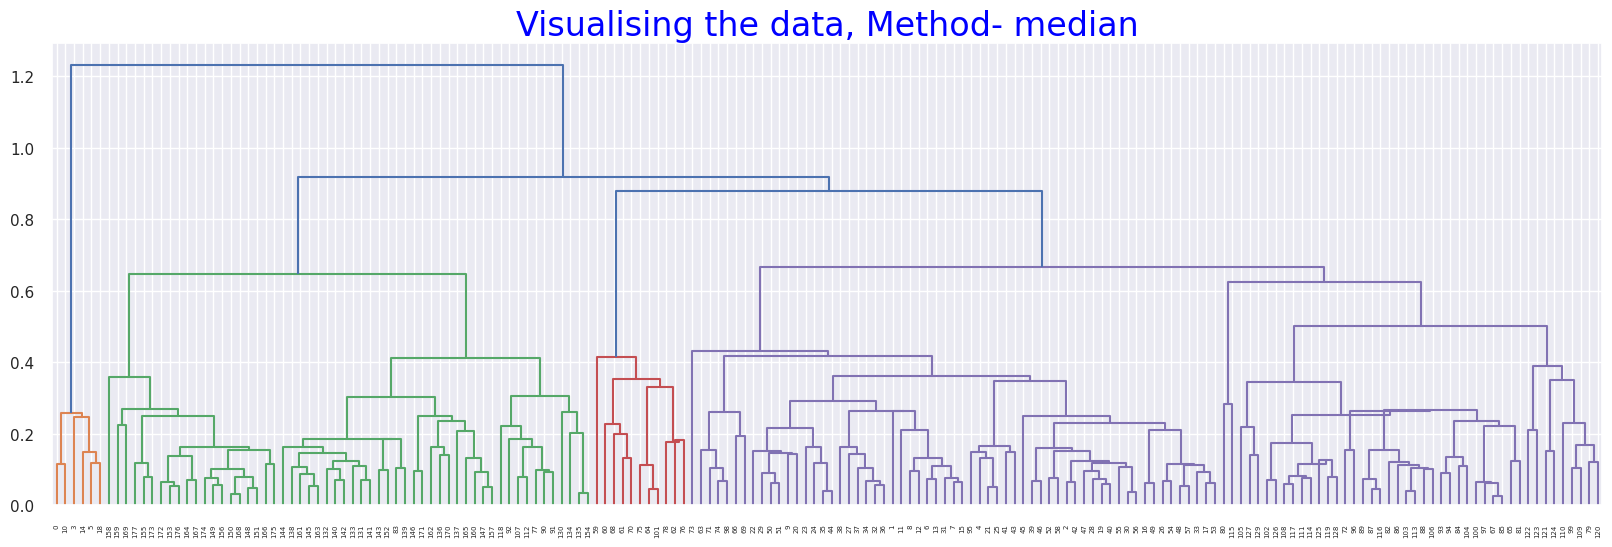

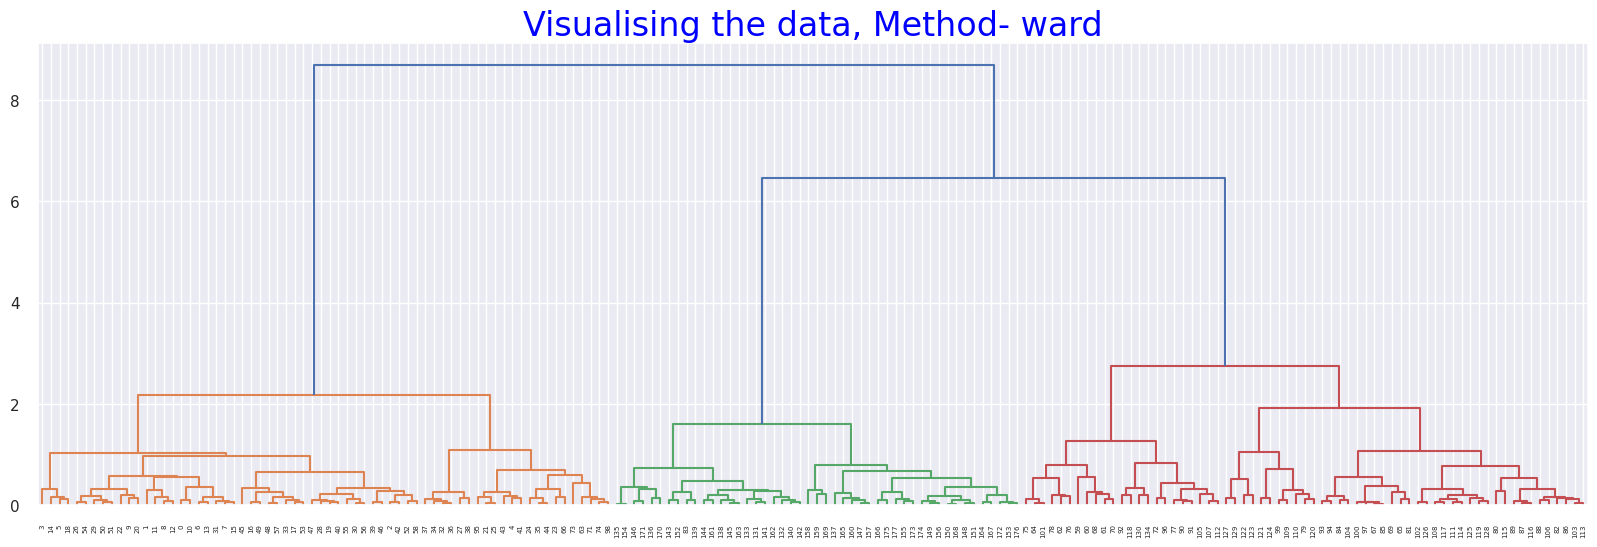

In [84]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

In [85]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [86]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4436935150655509
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121037
For n_clusters = 2 The average silhouette_score with linkage- average : 0.45988022636848064
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19347387677878106

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5124784618933621
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803287
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025498
For n_clusters = 3 The average silhouette_score with linkage- single : -0.004466488818666262

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4562664176188692
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4681313801022476
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4840694941767872

In [87]:
# Different Distance Methods

In [88]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4448273929121037
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.21595497316869947
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4448273929121037
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.21595497316869947
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4448273929121037

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.45988022636848064
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.45450203341693884
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.45988022636848064
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.45

In [89]:
import scipy.cluster.hierarchy as sch

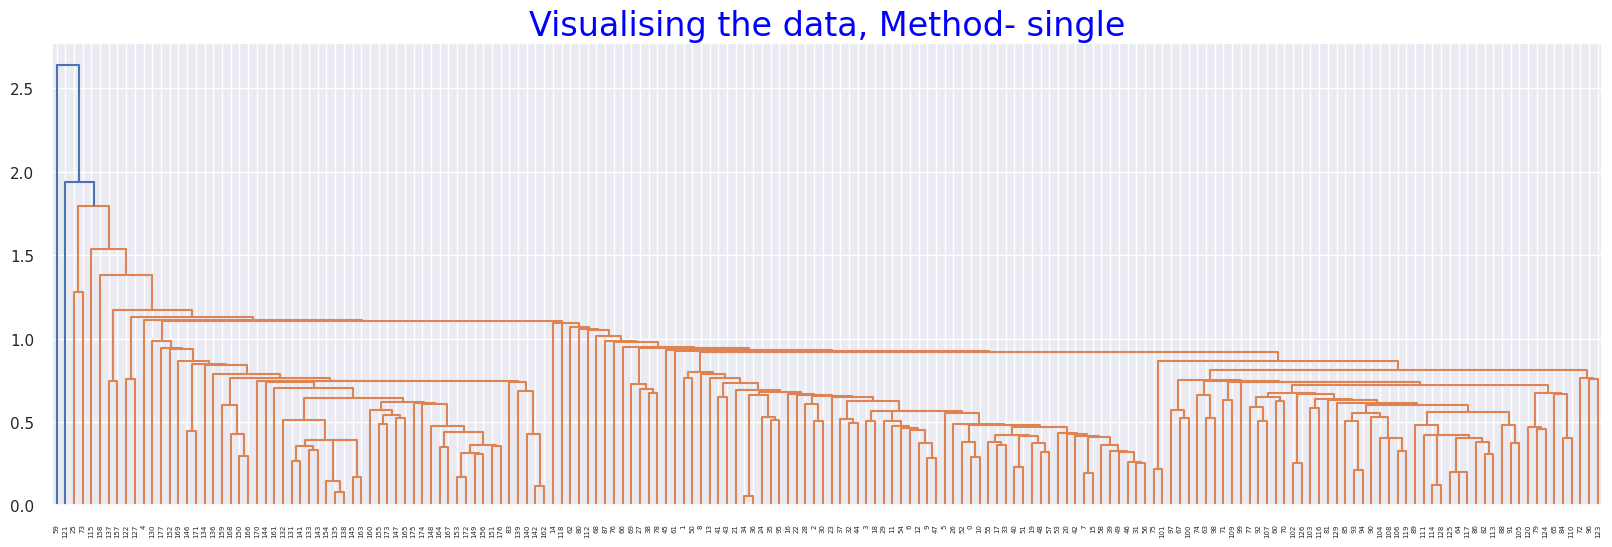

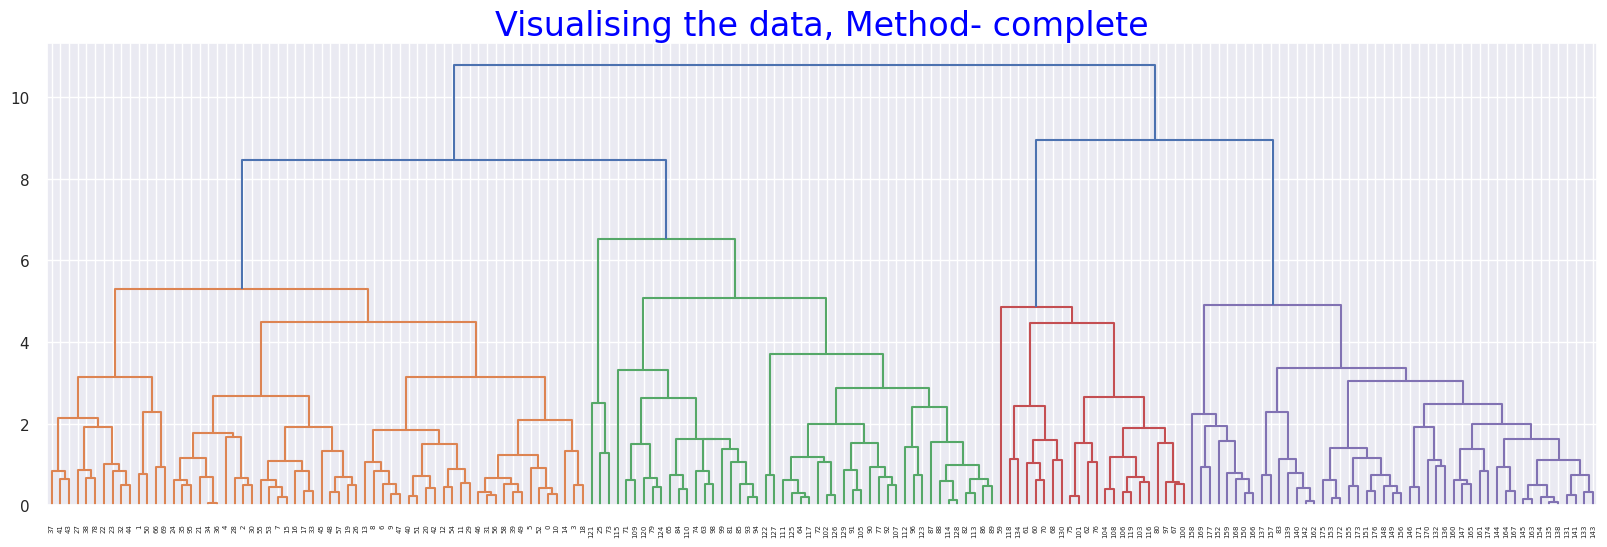

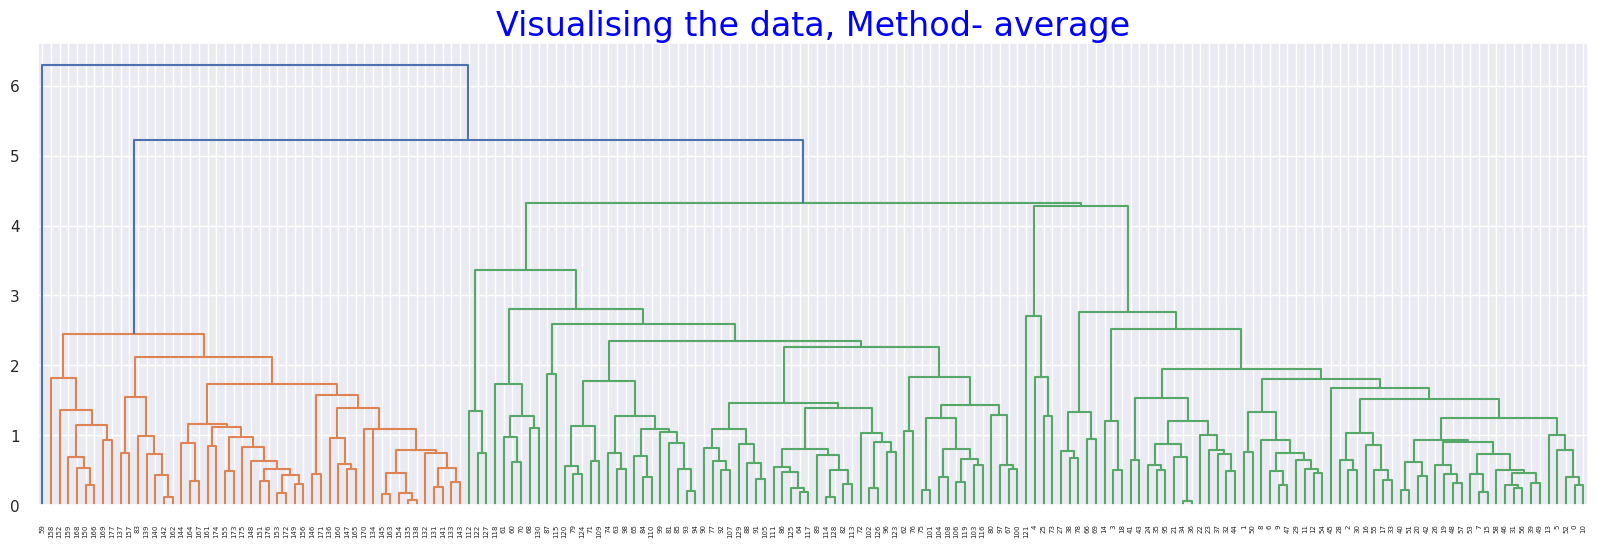

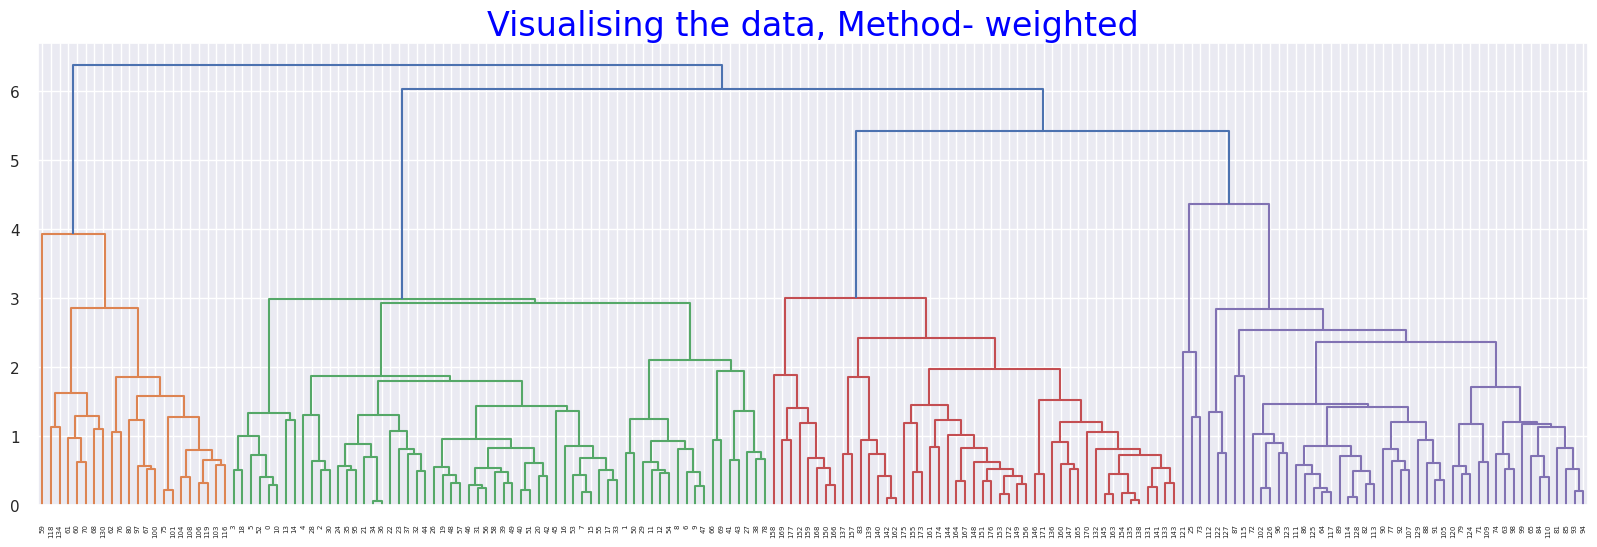

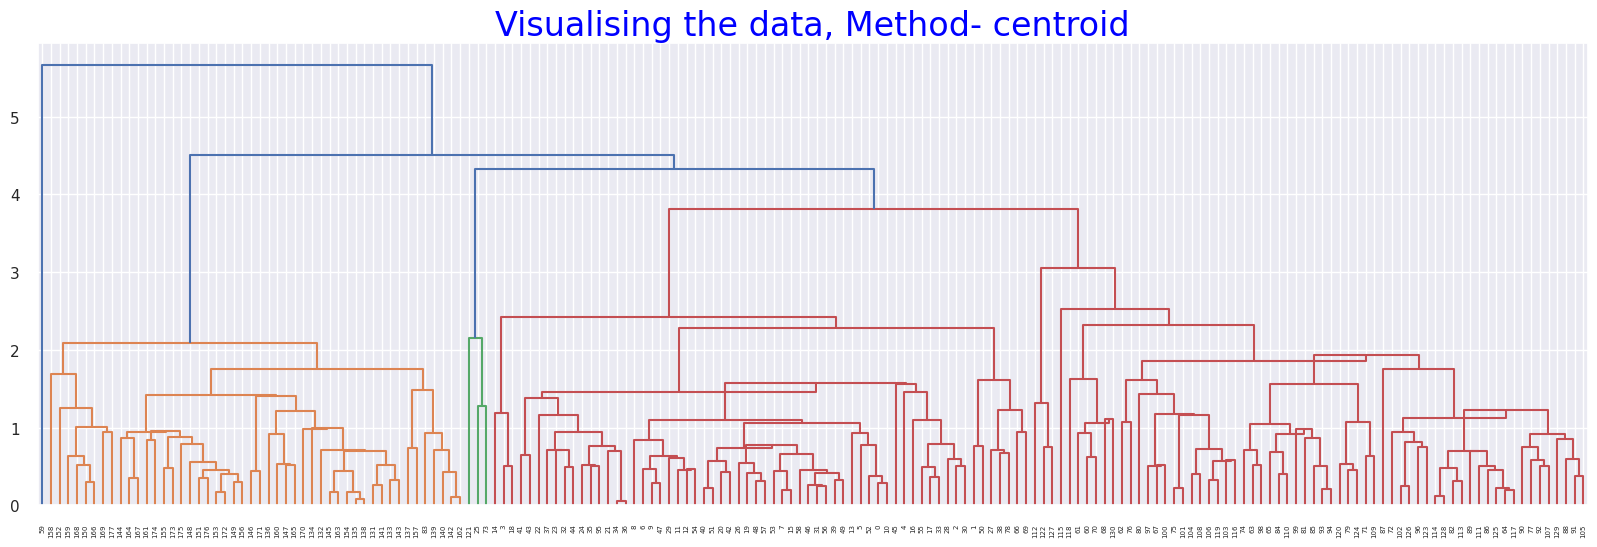

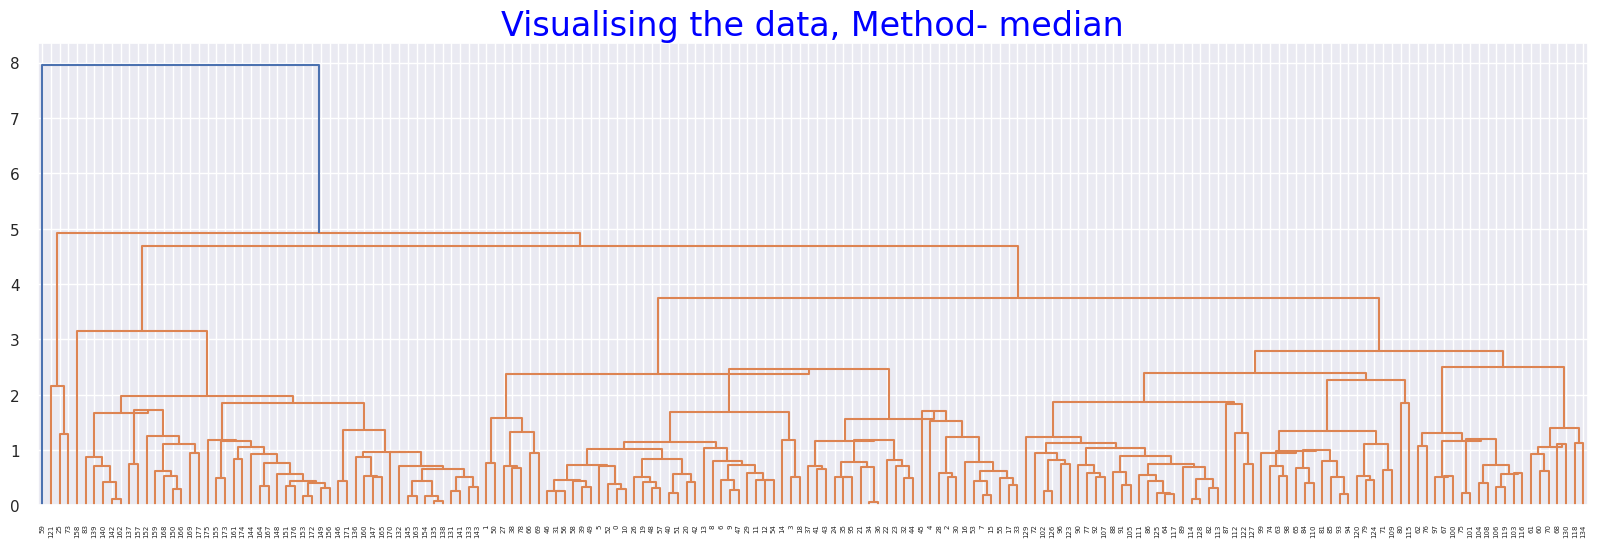

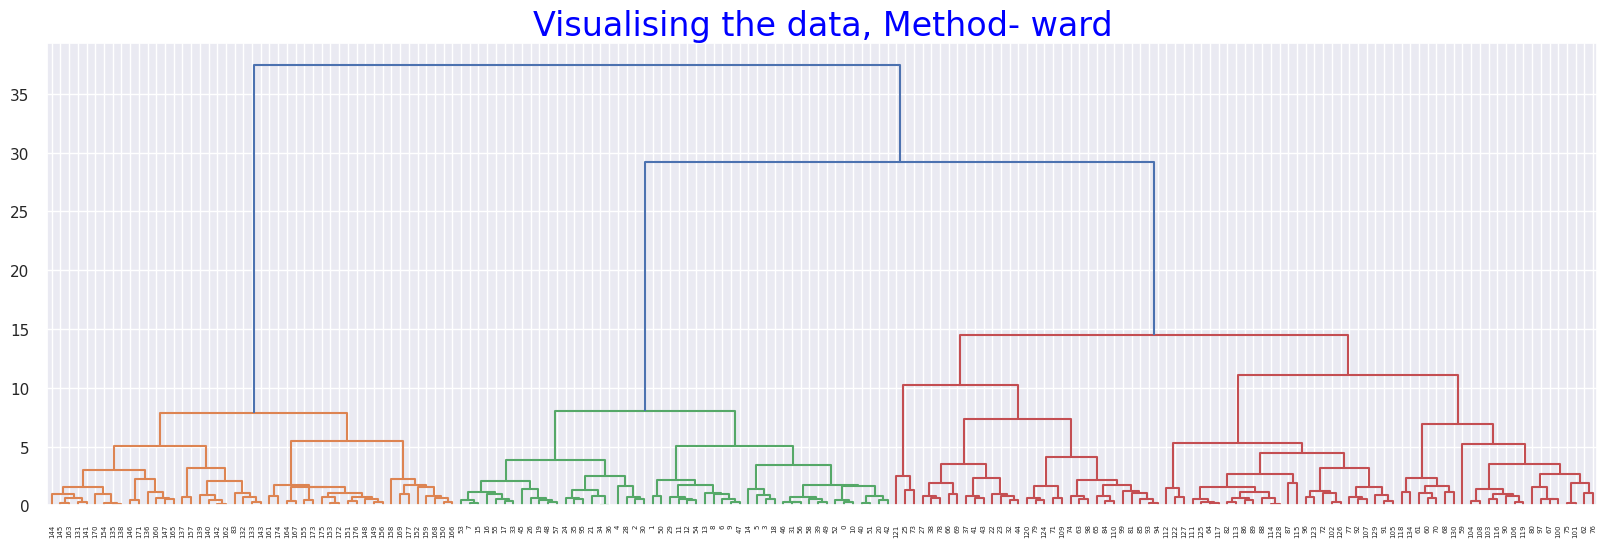

In [90]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [91]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092469
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34854041549326364
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34854041549326364

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265323
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526694
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2578938247338433

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.37397039586911796
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984906
For n_clusters = 4 The average silhouette_score with linkage- average : 0.46890675907642115

In [ ]:
# Agglomerative Clustering

In [92]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [93]:
agg_clustering.n_clusters_

4

In [94]:
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

In [95]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Hierarchical_labels  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [96]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548   92.000000   
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417   98.541667   
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419   1.959194      0.370645        1.529516   
1                    2.821385   2.942154      0.283077        1.946923   
2                    1.681667   0.788542      0.455833        1.167708   
3                    3.036667   3.550000      0.383333        1.916667   

                        Color       Hue  Dilution      Proline          ID  
                         mean      mean      mean         mean        mean  
Hierarchical_labels                                                         
0                    2.937097  1.042516  2.740000   497.564516   97.403226  
1                    5.378308  1.070308  3.124308  1072.276923   35.400000  
2                    7.410833  0.684375  1.698542   627.500000  153.520833  
3                    4.310000  1.123333  3.463333   760.000000   74.000000

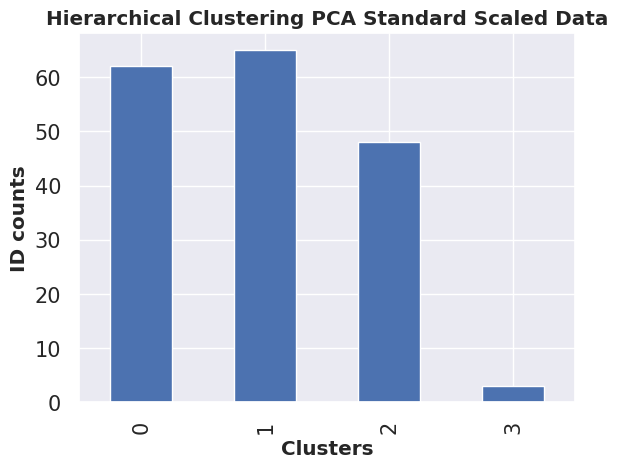

In [97]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(6.4,4.8))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

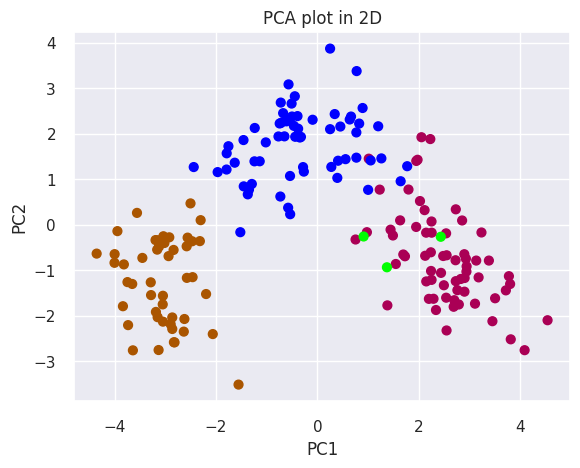

In [98]:
plt.figure(figsize=(6.4,4.8))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

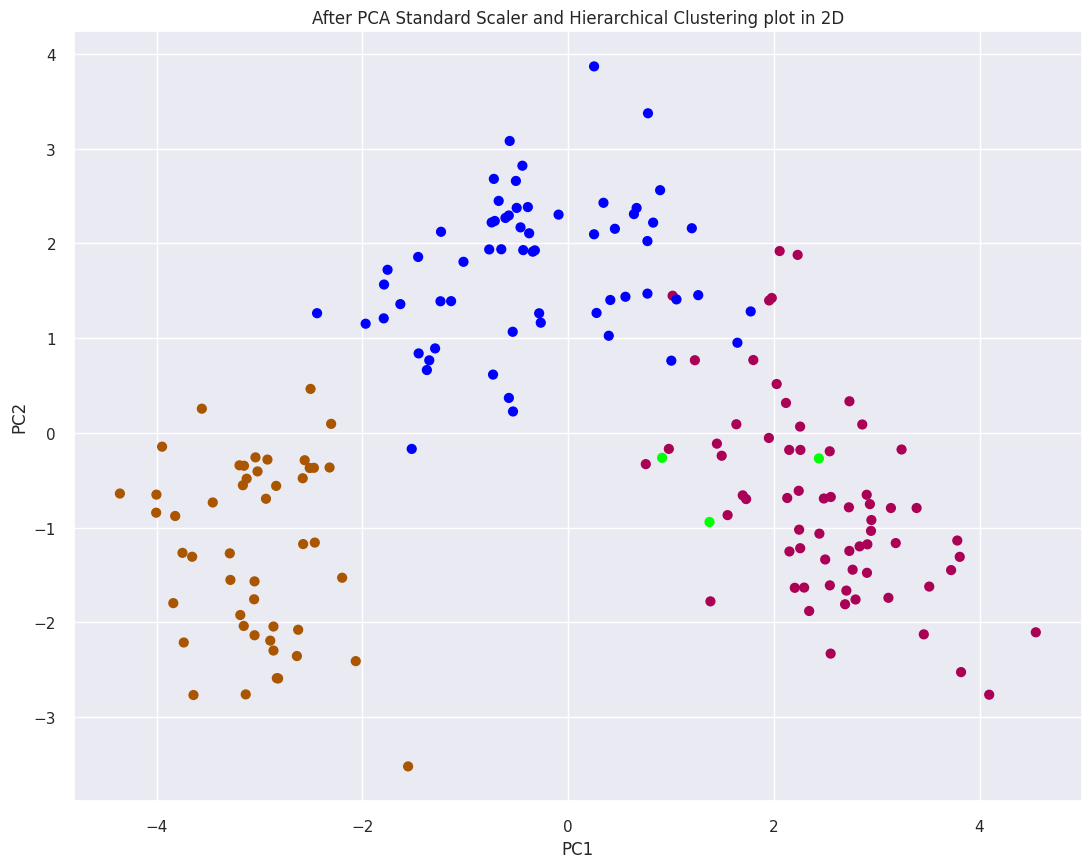

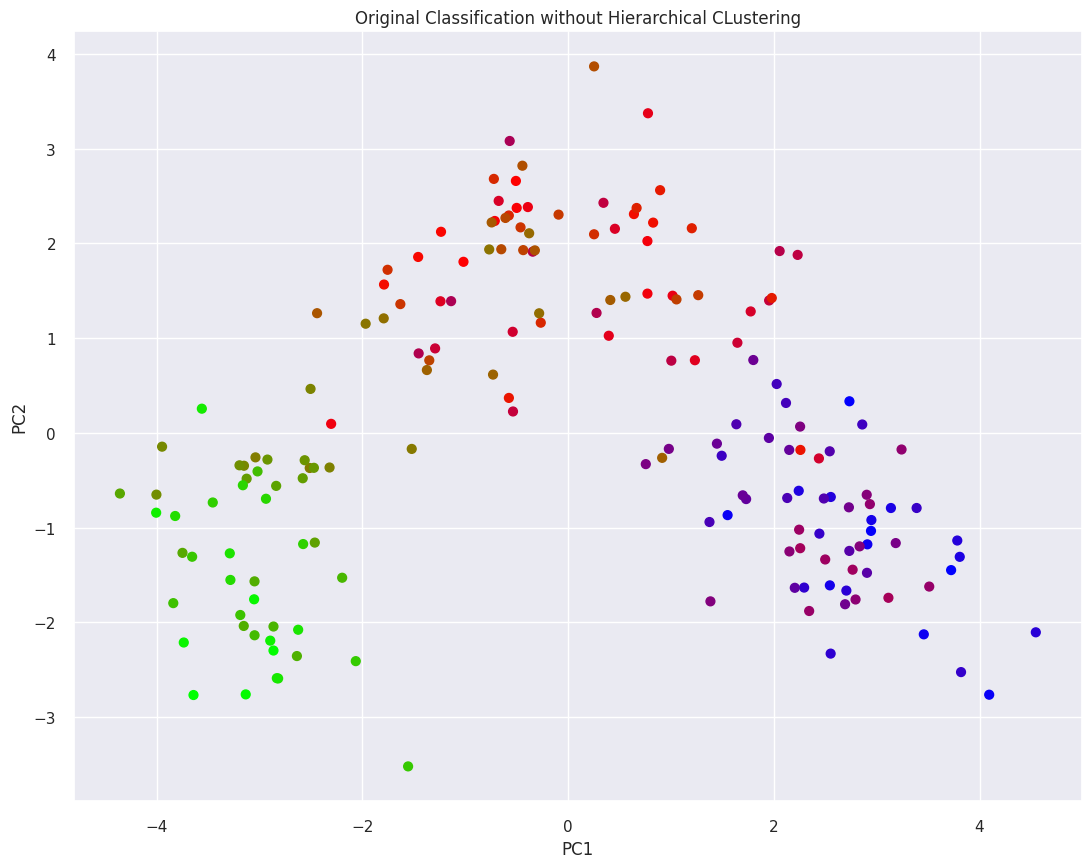

In [100]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['ID'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [101]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [102]:
agg_clustering.n_clusters_

3

In [103]:
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [104]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Hierarchical_labels  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2

In [105]:
df.groupby('Hierarchical_labels').agg(['mean'])


Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563   93.890625   
1                    13.157708  3.386042  2.437083  21.510417   98.541667   
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969   1.987656      0.372812        1.565781   
1                    1.681667   0.788542      0.455833        1.167708   
2                    2.874242   2.971970      0.282879        1.923030   

                        Color       Hue  Dilution      Proline          ID  
                         mean      mean      mean         mean        mean  
Hierarchical_labels                                                         
0                    2.994687  1.042437  2.746875   503.125000   97.578125  
1                    7.410833  0.684375  1.698542   627.500000  153.520833  
2                    5.347879  1.073636  3.144697  1070.106061   35.106061

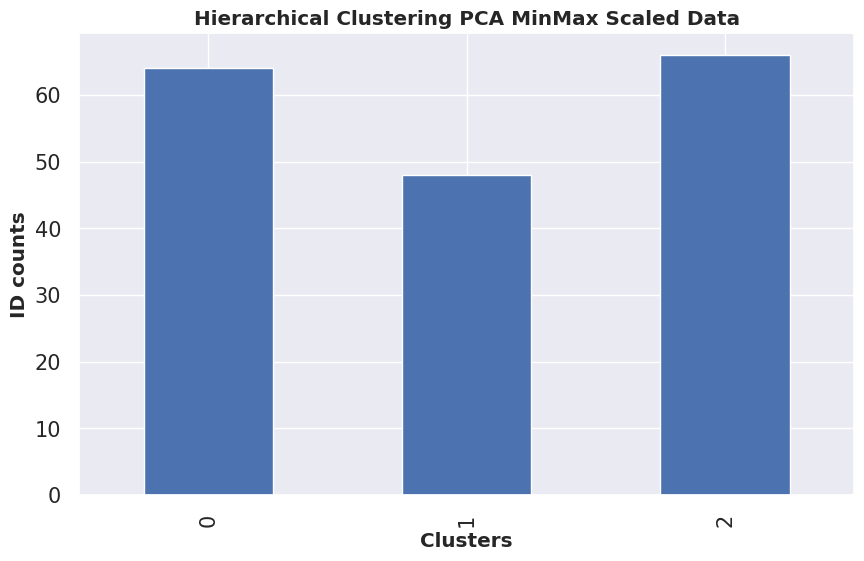

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

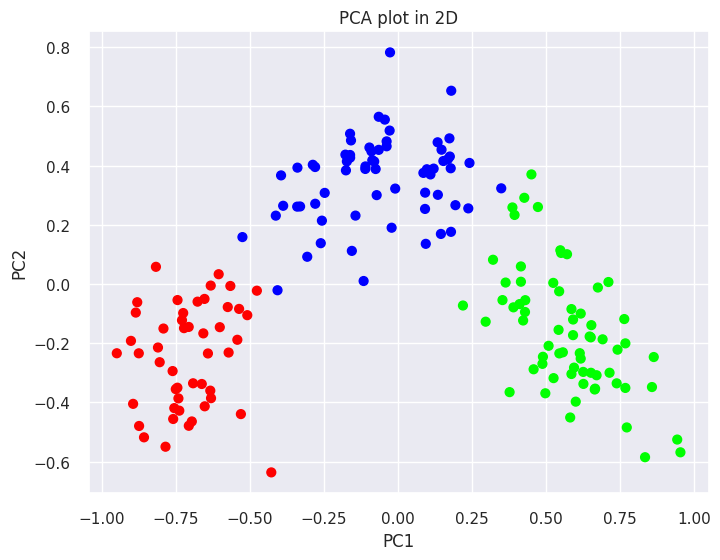

In [107]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

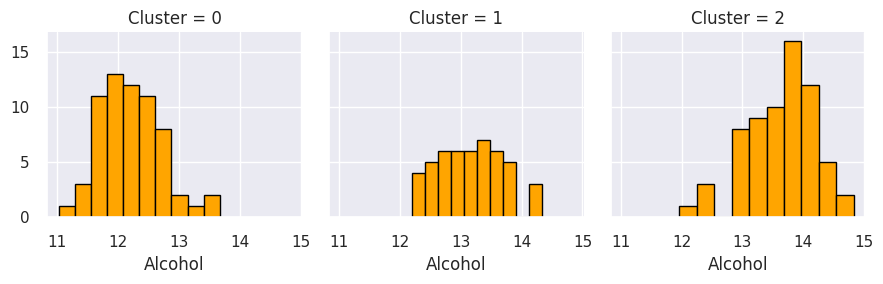

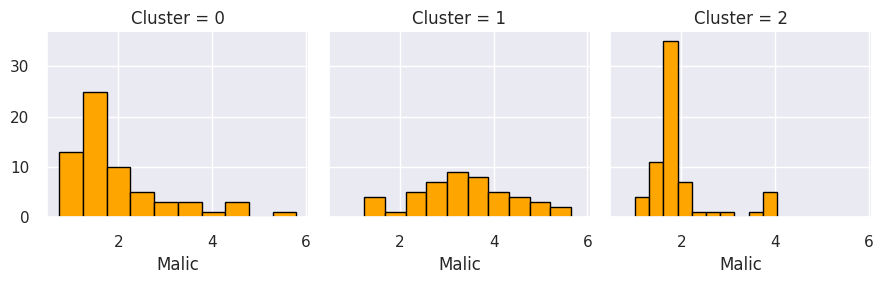

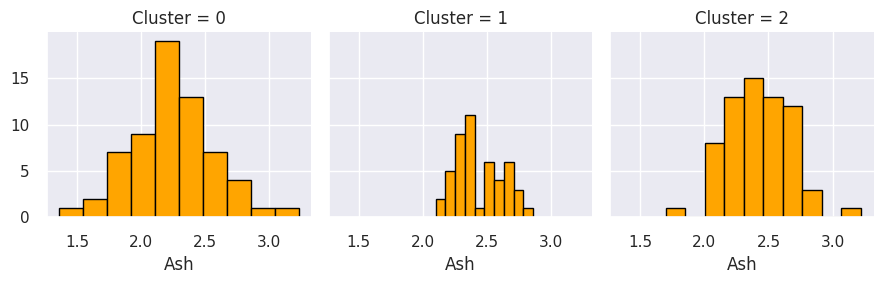

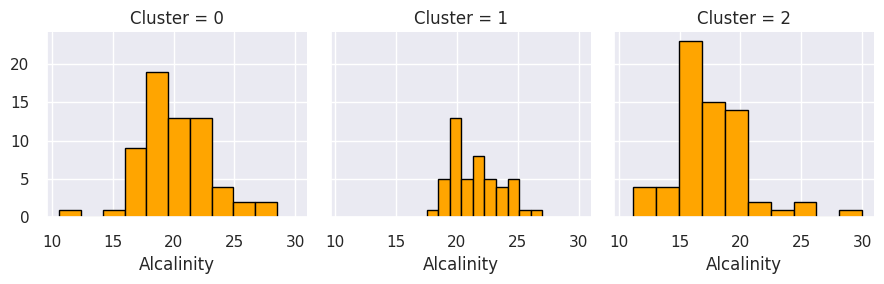

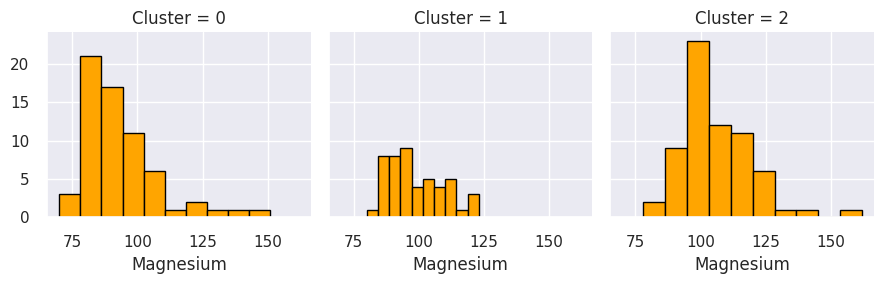

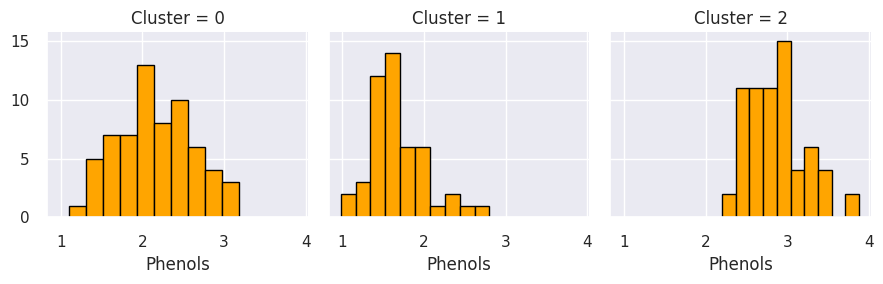

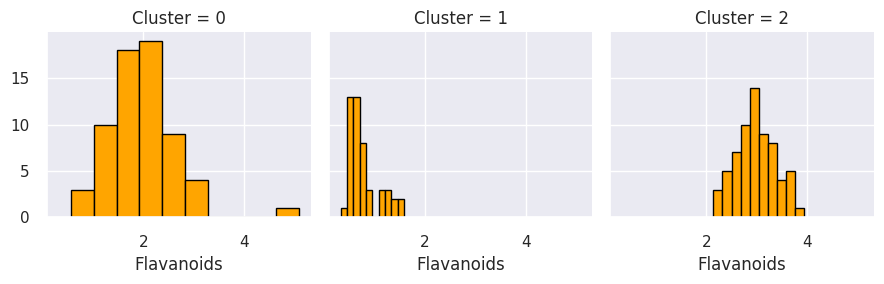

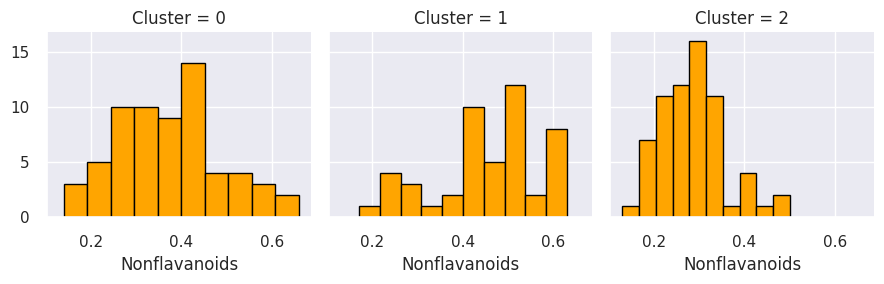

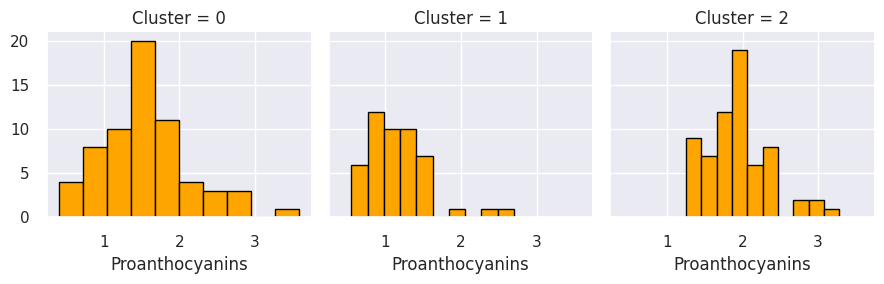

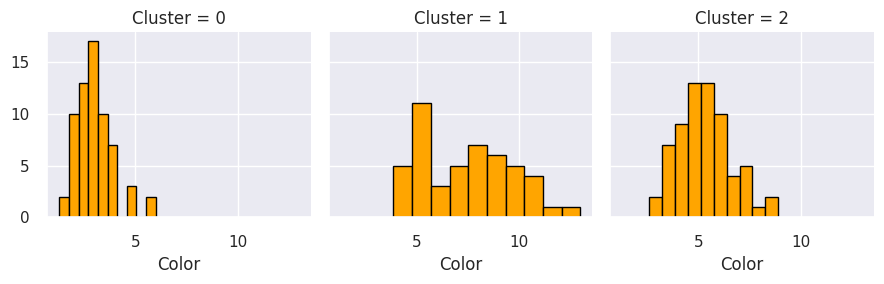

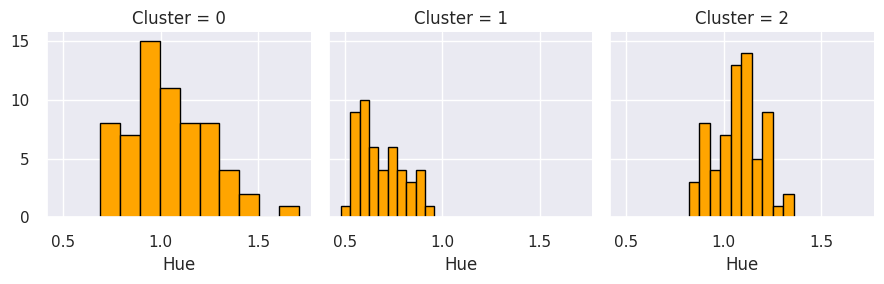

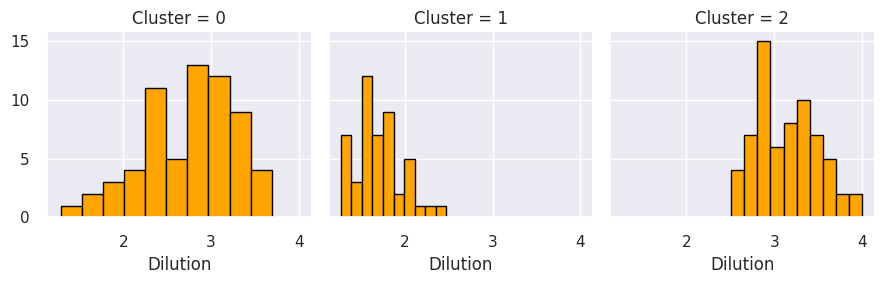

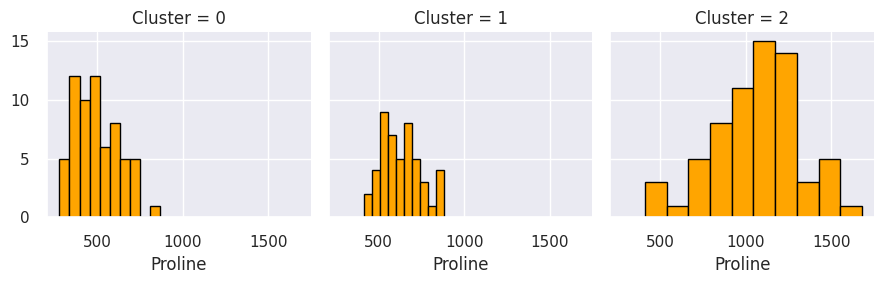

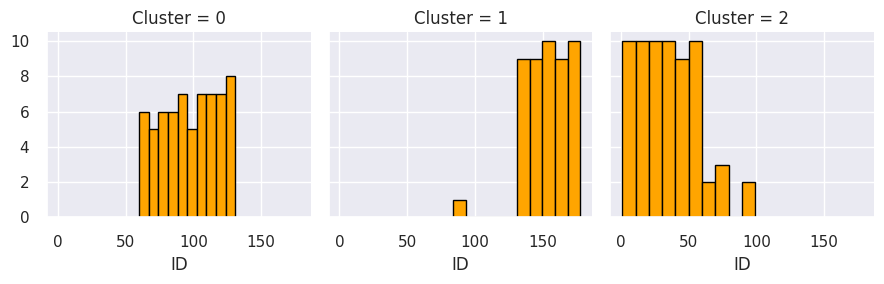

In [109]:
df1 = df.copy()
df1.rename({"Hierarchical_labels":'Cluster'}, axis=1,inplace=True)

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(20,20)}, font_scale=1)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="orange", lw=1, edgecolor="black")

In [110]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [111]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Alcohol             12.226094     13.157708     13.637424
Malic                1.964219      3.386042      1.933788
Ash                  2.244531      2.437083      2.433485
Alcalinity          20.076563     21.510417     17.465152
Magnesium           93.890625     98.541667    106.287879
Phenols              2.157969      1.681667      2.874242
Flavanoids           1.987656      0.788542      2.971970
Nonflavanoids        0.372812      0.455833      0.282879
Proanthocyanins      1.565781      1.167708      1.923030
Color                2.994688      7.410833      5.347879
Hue                  1.042438      0.684375      1.073636
Dilution             2.746875      1.698542      3.144697
Proline            503.125000    627.500000   1070.106061
ID                  97.578125    153.520833     35.106061
Cluster              0.000000      1.000000      2.000000

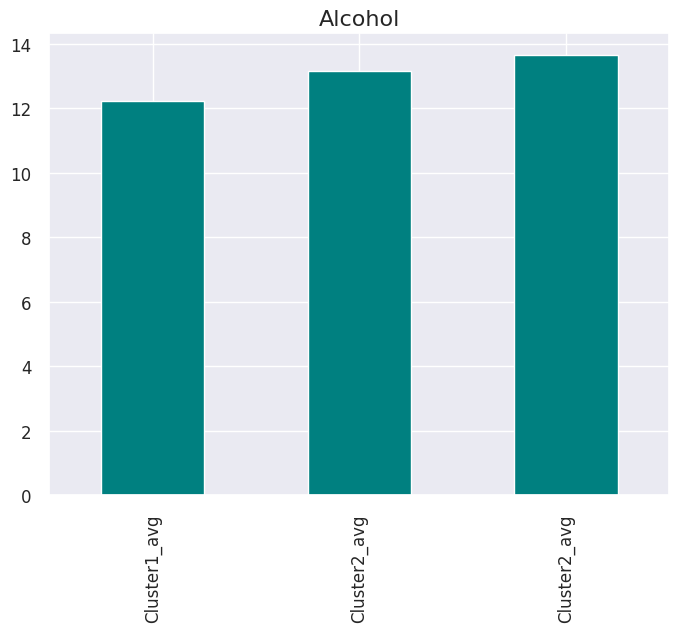

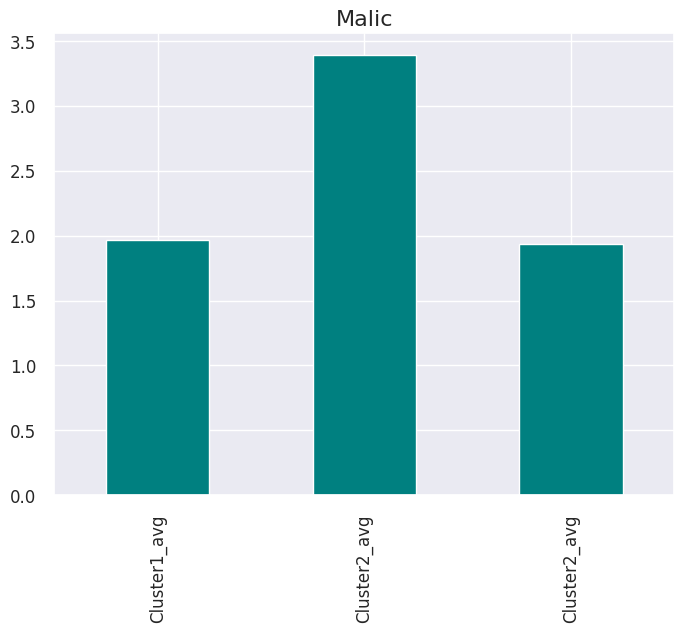

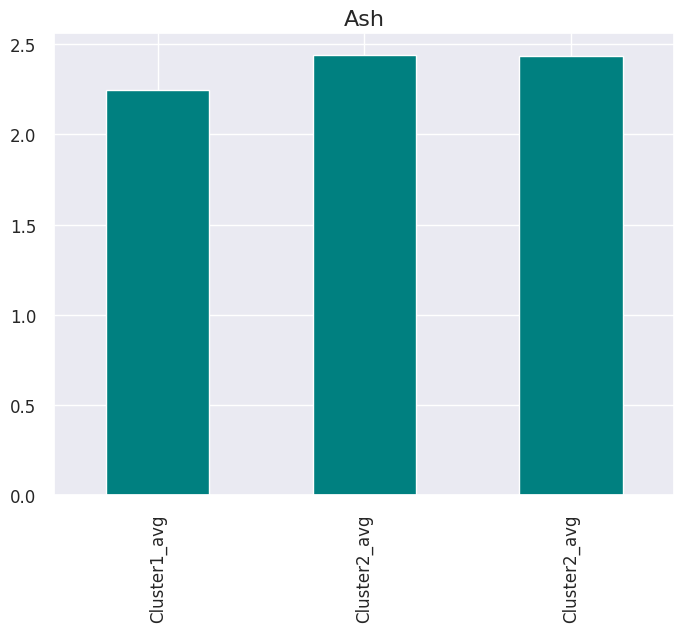

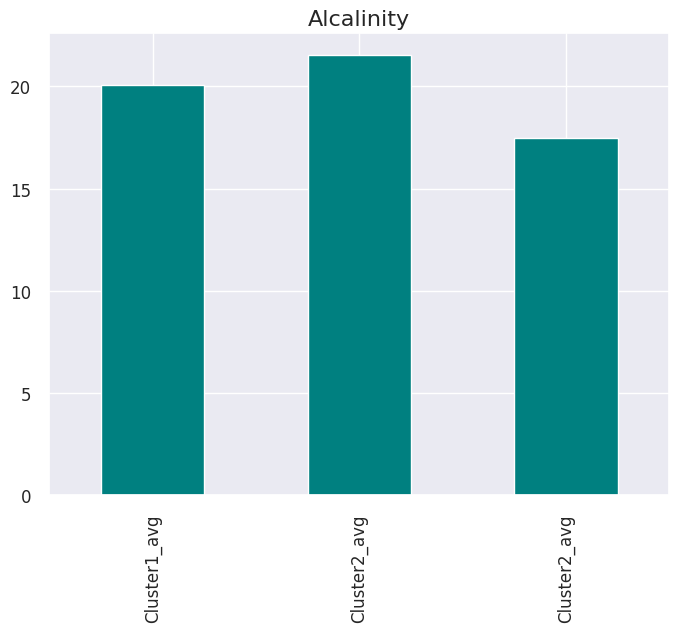

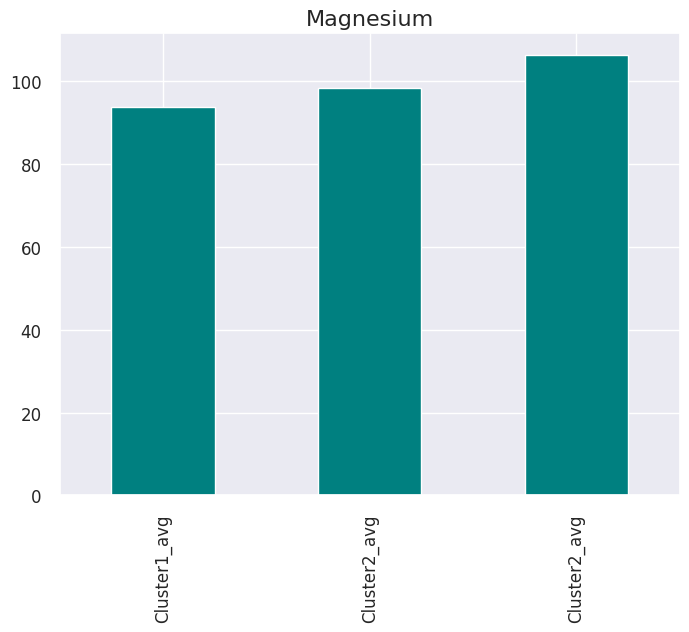

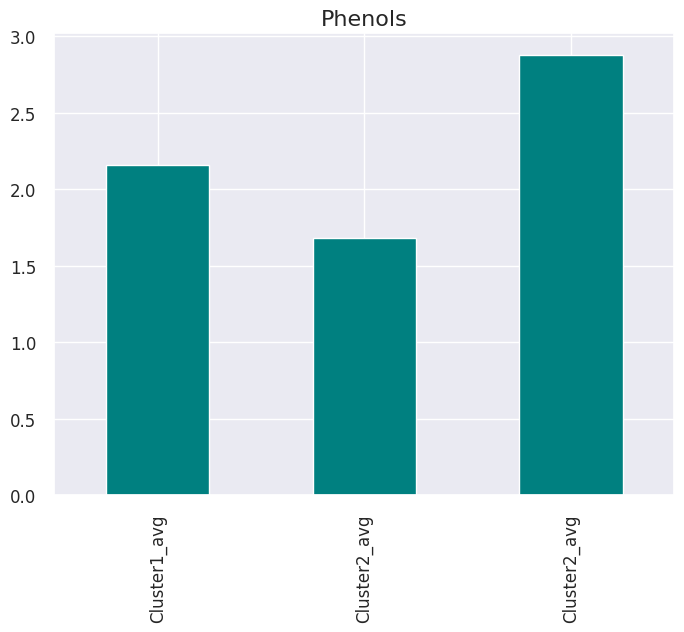

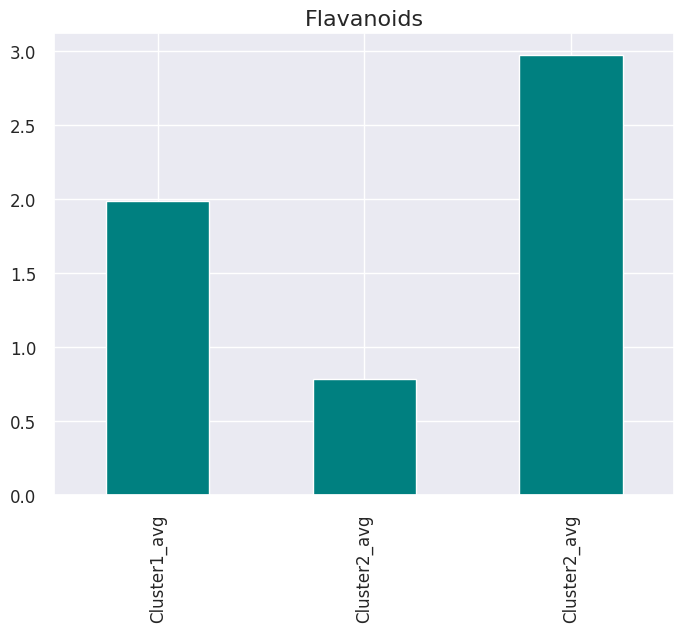

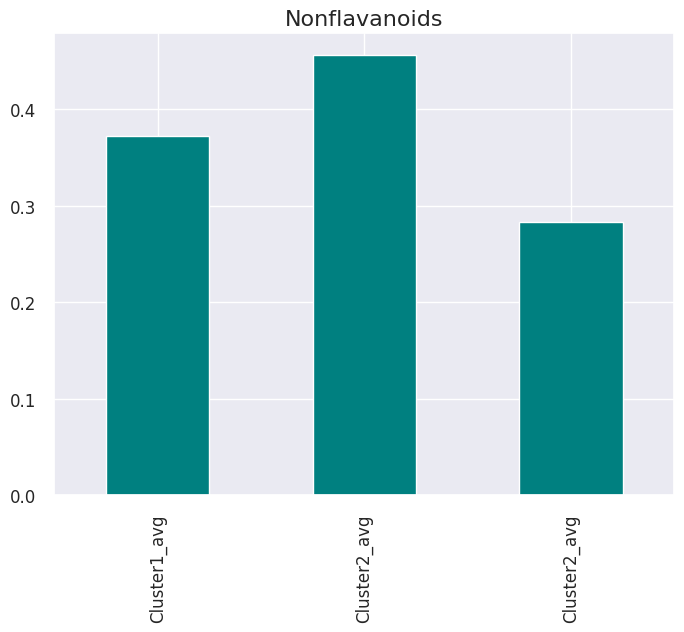

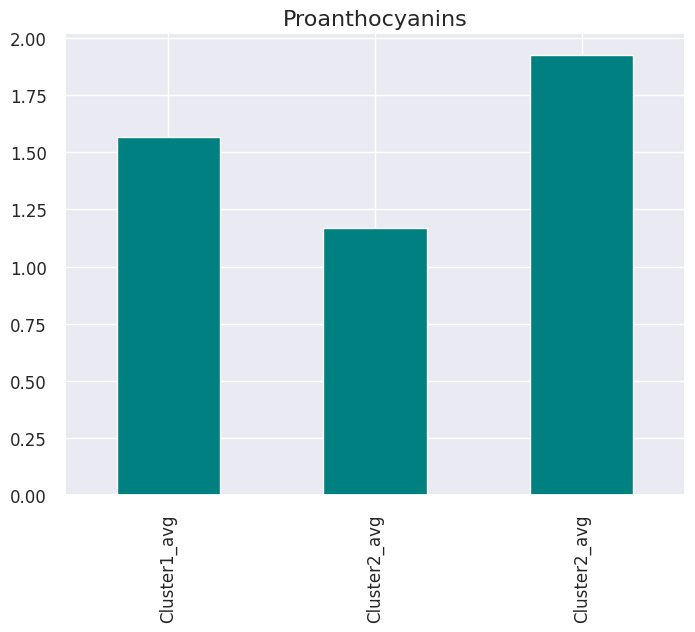

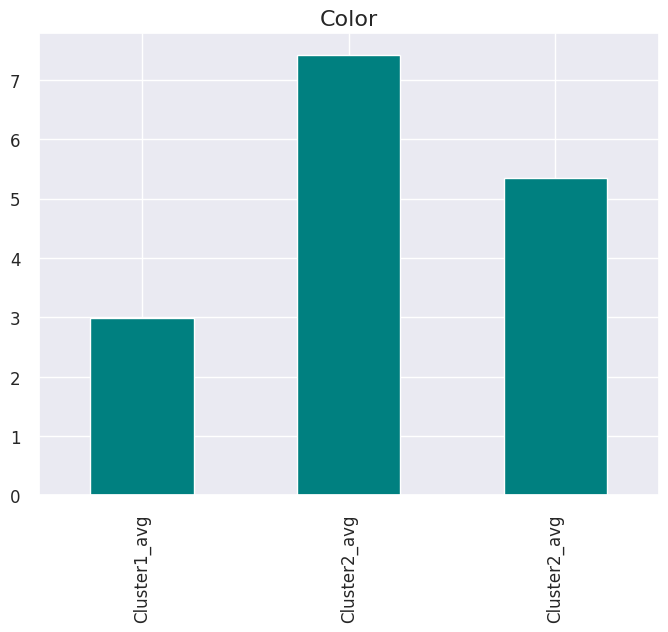

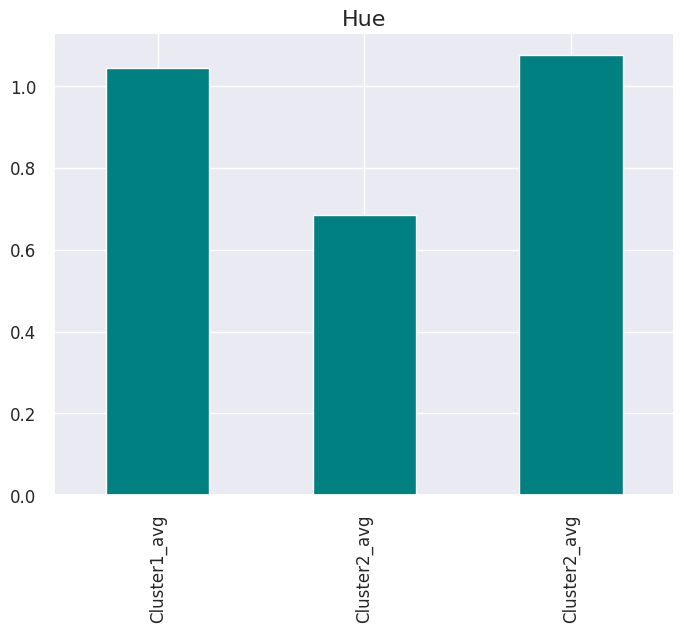

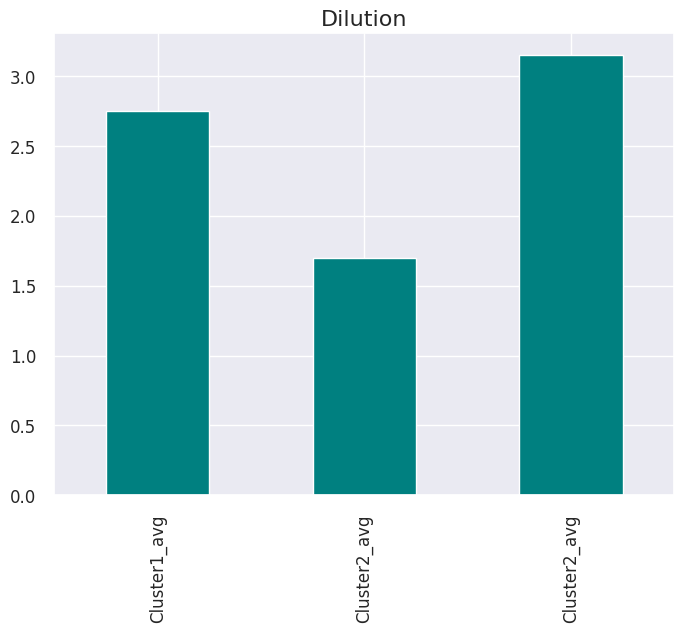

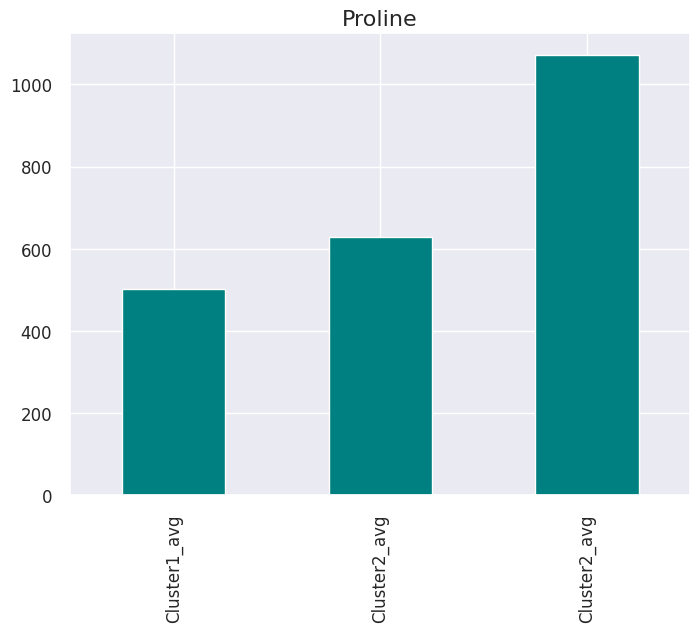

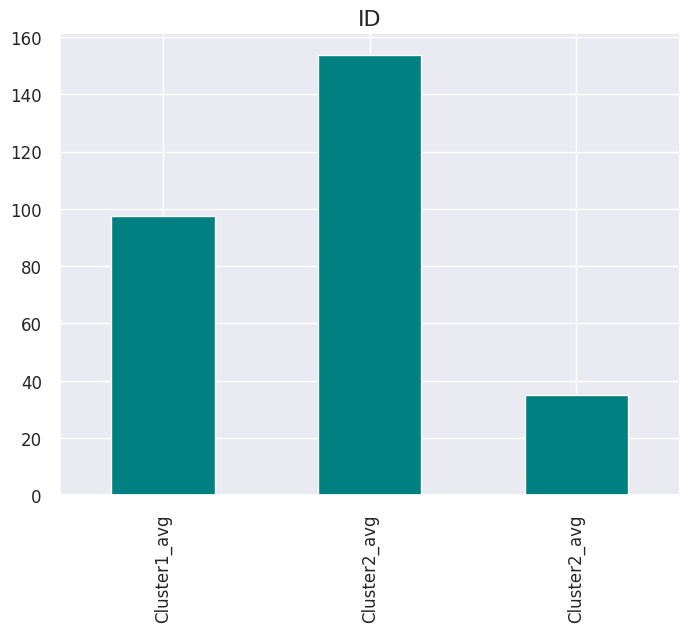

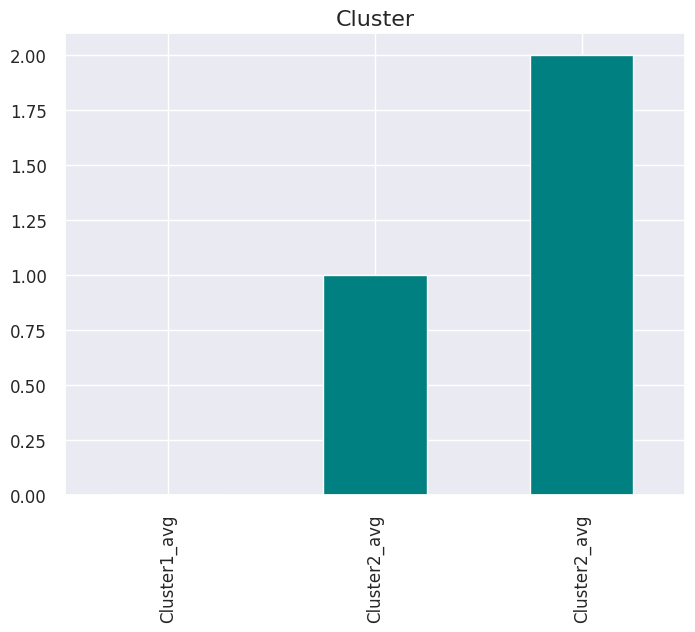

In [116]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=15)
    j.plot(kind='bar',fontsize=12, color='teal')
    plt.show()
    print()

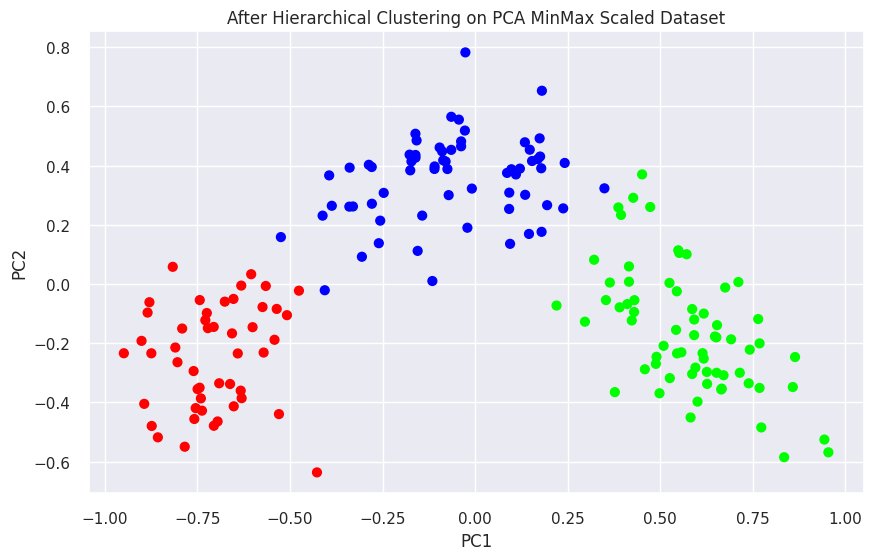

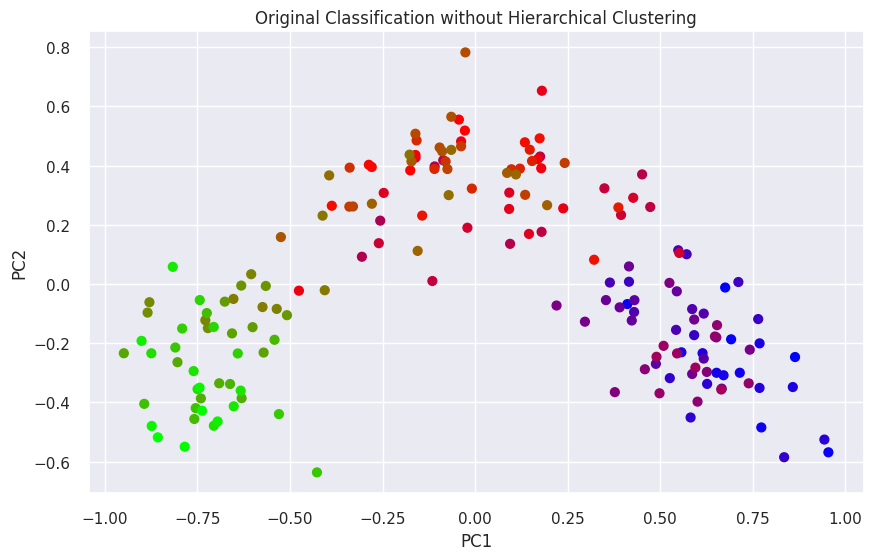

In [118]:
# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['ID'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

as you can see the clear difference in the chart